# Customer Segmentation using Clustering
***
This mini-project is based on [this blog post](http://blog.yhat.com/posts/customer-segmentation-using-python.html) by yhat. Please feel free to refer to the post for additional information, and solutions.

In [2]:
%matplotlib inline
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Setup Seaborn
sns.set_style("whitegrid")
sns.set_context("poster")

## Data

The dataset contains information on marketing newsletters/e-mail campaigns (e-mail offers sent to customers) and transaction level data from customers. The transactional data shows which offer customers responded to, and what the customer ended up buying. The data is presented as an Excel workbook containing two worksheets. Each worksheet contains a different dataset.

In [4]:
import commandLine as c

In [5]:
c.run("pwd")

["b'/mnt/c/Users/BrandonHoran/Documents/Work/Springboard/Projects/Capstone/clustering",
 "'"]

In [2]:
df_offers = pd.read_excel("./WineKMC.xlsx", sheetname=0)
df_offers.columns = ["offer_id", "campaign", "varietal", "min_qty", "discount", "origin", "past_peak"]
df_offers.head()

/home/brandon/anaconda3/lib/python3.7/site-packages/pandas/util/_decorators.py:188: FutureWarning: The `sheetname` keyword is deprecated, use `sheet_name` instead
  return func(*args, **kwargs)


AttributeError: module 'xlrd' has no attribute '__VERSION__'

In [ ]:
#Ok I don't know why this isn't working with read_excel anymore, but I comverted the two sheets to csvs.

We see that the first dataset contains information about each offer such as the month it is in effect and several attributes about the wine that the offer refers to: the variety, minimum quantity, discount, country of origin and whether or not it is past peak. The second dataset in the second worksheet contains transactional data -- which offer each customer responded to.

In [3]:
df_transactions = pd.read_excel("./WineKMC.xlsx", sheetname=1)
df_transactions.columns = ["customer_name", "offer_id"]
df_transactions['n'] = 1
df_transactions.head()

customer_name  offer_id  n
0         Smith         2  1
1         Smith        24  1
2       Johnson        17  1
3       Johnson        24  1
4       Johnson        26  1

In [8]:
df_offers = pd.read_csv("./WineKMC_offerInformation.csv")
df_offers.columns = ["offer_id", "campaign", "varietal", "min_qty", "discount", "origin", "past_peak"]
df_offers.head()

offer_id  campaign            varietal  min_qty  discount       origin  \
0         1   January              Malbec       72        56       France   
1         2   January          Pinot Noir       72        17       France   
2         3  February           Espumante      144        32       Oregon   
3         4  February           Champagne       72        48       France   
4         5  February  Cabernet Sauvignon      144        44  New Zealand   

   past_peak  
0      False  
1      False  
2       True  
3       True  
4       True

In [9]:
df_transactions = pd.read_csv("./WineKMC_transactions.csv")
df_transactions.columns = ["customer_name", "offer_id"]
df_transactions['n'] = 1
df_transactions.head()

customer_name  offer_id  n
0         Smith         2  1
1         Smith        24  1
2       Johnson        17  1
3       Johnson        24  1
4       Johnson        26  1

## Data wrangling

We're trying to learn more about how our customers behave, so we can use their behavior (whether or not they purchased something based on an offer) as a way to group similar minded customers together. We can then study those groups to look for patterns and trends which can help us formulate future offers.

The first thing we need is a way to compare customers. To do this, we're going to create a matrix that contains each customer and a 0/1 indicator for whether or not they responded to a given offer. 

<div class="span5 alert alert-info">
<h3>Checkup Exercise Set I</h3>

<p><b>Exercise:</b> Create a data frame where each row has the following columns (Use the pandas [`merge`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.merge.html) and [`pivot_table`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.pivot_table.html) functions for this purpose):
<ul>
<li> customer_name
<li> One column for each offer, with a 1 if the customer responded to the offer
</ul>
<p>Make sure you also deal with any weird values such as `NaN`. Read the documentation to develop your solution.</p>
</div>

In [13]:
#your turn
pd.pivot_table(df_transactions,columns=['offer_id','customer_name'])
#pd.merge(df_transactions, df_transactions, how='inner', left_on=['customer_name','offer_id'], right_on=['customer_name','offer_id'])

   offer_id  customer_name
n  1         Butler           1
             Fisher           1
             Foster           1
             Jackson          1
             Mitchell         1
             Peterson         1
             Price            1
             Sanders          1
             Thomas           1
             Wood             1
   2         Bell             1
             Campbell         1
             Cox              1
             Fisher           1
             Jackson          1
             Martin           1
             Mitchell         1
             Peterson         1
             Rodriguez        1
             Smith            1
   3         Brooks           1
             Lee              1
             Long             1
             Nelson           1
             Richardson       1
             Rogers           1
   4         Butler           1
             Clark            1
             Cooper           1
             Harris           1
             

In [34]:
df = pd.pivot_table(df_transactions,columns=['offer_id'],index='customer_name',fill_value=0)
df.head()
#pd.merge(df_transactions,df_transactions,on='customer_name')

n                             ...                              
offer_id      1  2  3  4  5  6  7  8  9  10  ... 23 24 25 26 27 28 29 30 31 32
customer_name                                ...                              
Adams          0  0  0  0  0  0  0  0  0  0  ...  0  0  0  0  0  0  1  1  0  0
Allen          0  0  0  0  0  0  0  0  1  0  ...  0  0  0  0  1  0  0  0  0  0
Anderson       0  0  0  0  0  0  0  0  0  0  ...  0  1  0  1  0  0  0  0  0  0
Bailey         0  0  0  0  0  0  1  0  0  0  ...  0  0  0  0  0  0  0  1  0  0
Baker          0  0  0  0  0  0  1  0  0  1  ...  0  0  0  0  0  0  0  0  1  0

[5 rows x 32 columns]

In [40]:
df.columns

MultiIndex(levels=[['n'], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]],
           codes=[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]],
           names=[None, 'offer_id'])

In [45]:
df.columns = arr

In [46]:
df.columns

Index(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13',
       '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25',
       '26', '27', '28', '29', '30', '31', '32'],
      dtype='object')

In [47]:
df.head()

1  2  3  4  5  6  7  8  9  10  ...  23  24  25  26  27  28  29  \
customer_name                                 ...                               
Adams          0  0  0  0  0  0  0  0  0   0  ...   0   0   0   0   0   0   1   
Allen          0  0  0  0  0  0  0  0  1   0  ...   0   0   0   0   1   0   0   
Anderson       0  0  0  0  0  0  0  0  0   0  ...   0   1   0   1   0   0   0   
Bailey         0  0  0  0  0  0  1  0  0   0  ...   0   0   0   0   0   0   0   
Baker          0  0  0  0  0  0  1  0  0   1  ...   0   0   0   0   0   0   0   

               30  31  32  
customer_name              
Adams           1   0   0  
Allen           0   0   0  
Anderson        0   0   0  
Bailey          1   0   0  
Baker           0   1   0  

[5 rows x 32 columns]

In [50]:
df

1  2  3  4  5  6  7  8  9  10  ...  23  24  25  26  27  28  29  \
customer_name                                 ...                               
Adams          0  0  0  0  0  0  0  0  0   0  ...   0   0   0   0   0   0   1   
Allen          0  0  0  0  0  0  0  0  1   0  ...   0   0   0   0   1   0   0   
Anderson       0  0  0  0  0  0  0  0  0   0  ...   0   1   0   1   0   0   0   
Bailey         0  0  0  0  0  0  1  0  0   0  ...   0   0   0   0   0   0   0   
Baker          0  0  0  0  0  0  1  0  0   1  ...   0   0   0   0   0   0   0   
Barnes         0  0  0  0  0  0  0  0  0   1  ...   0   0   0   0   0   0   0   
Bell           0  1  0  0  0  0  0  0  0   0  ...   0   1   0   1   0   0   0   
Bennett        0  0  0  0  0  0  0  1  0   0  ...   0   0   0   0   0   0   1   
Brooks         0  0  1  0  0  0  0  1  0   0  ...   0   0   0   0   0   0   0   
Brown          0  0  0  0  0  0  1  0  0   0  ...   0   0   0   0   0   0   1   
Butler         1  0  0  1  0  0  0  0  0   0  ...   0   0   0   0   0   1   0   
Campbell       0  1  0  0  0  0  0  0  0   0  ...   0   1   0   1   0   0   0   
Carter         0  0  0  0  0  0  1  0  0   0  ...   0   0   0   0   0   0   1   
Clark          0  0  0  1  0  0  0  0  0   0  ...   0   0   0   0   0   1   0   
Collins        0  0  0  0  0  0  0  0  0   0  ...   0   0   0   0   0   0   0   
Cook           0  0  0  0  0  0  0  0  0   0  ...   0   1   0   1   0   0   0   
Cooper         0  0  0  1  0  0  0  0  0   0  ...   0   0   0   0   0   0   0   
Cox            0  1  0  0  0  0  0  0  0   0  ...   0   1   0   1   0   0   0   
Cruz           0  0  0  0  0  0  0  0  0   0  ...   0   0   0   0   0   0   1   
Davis          0  0  0  0  0  0  0  0  0   0  ...   0   0   1   0   0   0   0   
Diaz           0  0  0  0  0  0  1  1  0   0  ...   0   0   0   0   0   0   1   
Edwards        0  0  0  0  0  0  0  1  0   0  ...   0   0   0   0   1   0   0   
Evans          0  0  0  0  0  0  0  0  0   0  ...   0   0   0   0   1   0   0   
Fisher         1  1  0  0  0  0  0  0  0   0  ...   0   0   0   0   0   1   0   
Flores         0  0  0  0  0  0  0  0  0   0  ...   0   1   0   0   0   0   0   
Foster         1  0  0  0  0  0  0  0  1   0  ...   1   0   0   0   0   0   0   
Garcia         0  0  0  0  0  0  0  0  0   0  ...   0   0   0   0   0   0   0   
Gomez          0  0  0  0  0  0  0  0  0   0  ...   0   0   1   0   0   0   0   
Gonzalez       0  0  0  0  0  0  0  0  1   0  ...   0   0   0   0   0   0   0   
Gray           0  0  0  0  0  0  0  0  0   0  ...   0   0   0   1   0   0   0   
...           .. .. .. .. .. .. .. .. ..  ..  ...  ..  ..  ..  ..  ..  ..  ..   
Reed           0  0  0  0  1  0  0  0  0   0  ...   0   0   0   0   0   0   0   
Reyes          0  0  0  0  0  0  0  0  1   0  ...   1   0   0   0   0   0   0   
Richardson     0  0  1  0  0  1  0  0  0   0  ...   0   0   0   0   0   0   0   
Rivera         0  0  0  0  0  0  1  0  0   0  ...   0   0   0   0   0   0   0   
Roberts        0  0  0  0  0  0  0  0  0   0  ...   0   0   0   0   0   0   0   
Robinson       0  0  0  0  0  0  1  0  0   0  ...   0   0   0   0   0   0   1   
Rodriguez      0  1  0  0  0  0  0  0  0   0  ...   0   0   0   1   0   0   0   
Rogers         0  0  1  0  0  0  1  1  0   0  ...   0   0   0   0   0   0   0   
Ross           0  0  0  0  0  0  0  0  0   0  ...   0   0   0   0   0   0   0   
Russell        0  0  0  0  0  0  0  0  0   0  ...   0   0   0   1   0   0   0   
Sanchez        0  0  0  1  1  0  0  0  0   0  ...   0   0   0   1   0   0   0   
Sanders        1  0  0  1  1  1  0  0  1   0  ...   0   0   1   1   0   0   0   
Scott          0  0  0  0  0  1  0  0  0   0  ...   1   0   0   0   0   0   0   
Smith          0  1  0  0  0  0  0  0  0   0  ...   0   1   0   0   0   0   0   
Stewart        0  0  0  0  0  0  0  1  0   0  ...   0   0   0   0   0   0   1   
Sullivan       0  0  0  0  0  0  0  1  0   0  ...   0   0   0   0   0   0   0   
Taylor         0  0  0  0  0  0  1  0  0   0  

## K-Means Clustering

Recall that in K-Means Clustering we want to *maximize* the distance between centroids and *minimize* the distance between data points and the respective centroid for the cluster they are in. True evaluation for unsupervised learning would require labeled data; however, we can use a variety of intuitive metrics to try to pick the number of clusters K. We will introduce two methods: the Elbow method, the Silhouette method and the gap statistic.

### Choosing K: The Elbow Sum-of-Squares Method

The first method looks at the sum-of-squares error in each cluster against $K$. We compute the distance from each data point to the center of the cluster (centroid) to which the data point was assigned. 

$$SS = \sum_k \sum_{x_i \in C_k} \sum_{x_j \in C_k} \left( x_i - x_j \right)^2 = \sum_k \sum_{x_i \in C_k} \left( x_i - \mu_k \right)^2$$

where $x_i$ is a point, $C_k$ represents cluster $k$ and $\mu_k$ is the centroid for cluster $k$. We can plot SS vs. $K$ and choose the *elbow point* in the plot as the best value for $K$. The elbow point is the point at which the plot starts descending much more slowly. 

<div class="span5 alert alert-info">
<h3>Checkup Exercise Set II</h3>

<p><b>Exercise:</b></p> 
<ul>
<li> What values of $SS$ do you believe represent better clusterings? Why?
<li> Create a numpy matrix `x_cols` with only the columns representing the offers (i.e. the 0/1 colums) 
<li> Write code that applies the [`KMeans`](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) clustering method from scikit-learn to this matrix. 
<li> Construct a plot showing $SS$ for each $K$ and pick $K$ using this plot. For simplicity, test $2 \le K \le 10$.
<li> Make a bar chart showing the number of points in each cluster for k-means under the best $K$.
<li> What challenges did you experience using the Elbow method to pick $K$?
</ul>
</div>

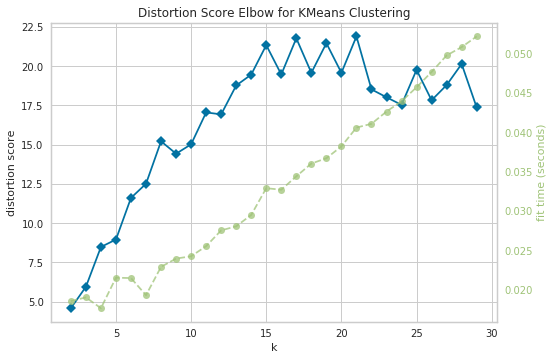

In [49]:
# your turn
#Well, smaller should be better because points are closer to the cluster centers.
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,30))

visualizer.fit(df)    # Fit the data to the visualizer
visualizer.poof()    # Draw/show/poof the data
#So...I kinda skipped making the matrix. But isn't this doing exactly what it asked me to do anyway?
#I don't think it makes a lot of sense to stop at 10 clusters here.
#Then again, we literally only have 100 data points, so it honestly doesn't make that much sense to have 15-30 clusters.
#This problem is really weird. Am I doing something wrong here? There are way too few points to cluster...

In [44]:
arr = []
for i in range(1, 33):
    arr.append(str(i))

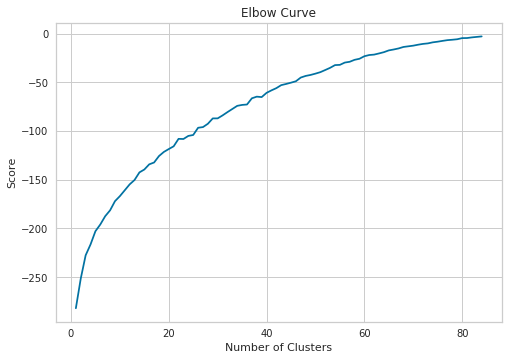

In [54]:
#found this from https://www.datasciencecentral.com/profiles/blogs/python-implementing-a-k-means-algorithm-with-sklearn
Nc = range(1, 85)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(df).score(df) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

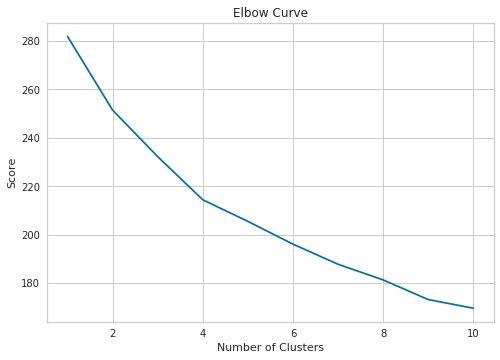

In [58]:
#Not sure what these different scoring methods are showing to be completely honest.
#But I guess we can get the SS directly from the inertia attribute.
plt.plot(Nc[0:10],score[0:10])
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

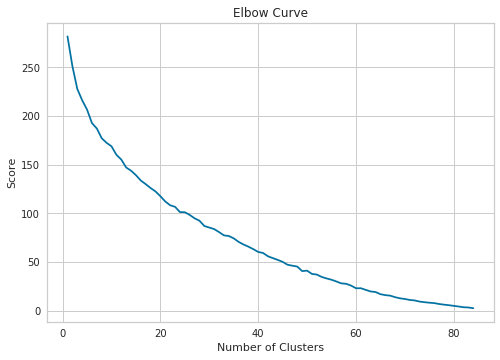

In [59]:
score = [kmeans[i].fit(df).inertia_ for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [61]:
#I'm not even sure we can easily pick a best k, making it hard to make a chart with the number points in each cluster for
#the best k. But I will just try to pick one that makes some sense and use that one.
#Let's pick k=4 since there is a bend in the SS score there.
kmeans[3].labels_

array([0, 1, 2, 0, 1, 3, 2, 0, 1, 0, 3, 2, 0, 1, 1, 2, 1, 2, 0, 1, 0, 1,
       1, 3, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 3, 0, 2, 2, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 3, 3, 2, 1, 0, 2, 1, 0, 1, 1, 1, 1, 0, 0, 3,
       2, 1, 3, 1, 1, 1, 1, 0, 1, 0, 2, 1, 1, 1, 1, 1, 1, 2, 0, 0, 0, 3,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 3, 1, 1], dtype=int32)

In [62]:
kmeans[3].cluster_centers_

array([[-2.77555756e-17, -2.77555756e-17, -3.46944695e-17,
        -6.93889390e-17, -1.38777878e-17, -6.93889390e-17,
         5.00000000e-01,  4.58333333e-01, -2.77555756e-17,
        -4.16333634e-17,  8.32667268e-17, -1.38777878e-17,
         2.50000000e-01, -2.77555756e-17, -3.46944695e-17,
        -1.38777878e-17, -4.16333634e-17,  4.58333333e-01,
        -1.38777878e-17, -3.46944695e-17, -1.38777878e-17,
         0.00000000e+00, -1.38777878e-17, -6.93889390e-17,
        -3.46944695e-17,  5.55111512e-17, -2.77555756e-17,
        -3.46944695e-17,  6.25000000e-01,  6.66666667e-01,
         5.55111512e-17, -1.38777878e-17],
       [ 1.92307692e-02,  1.92307692e-02,  1.15384615e-01,
         1.92307692e-01,  7.69230769e-02,  2.11538462e-01,
         1.34615385e-01,  1.73076923e-01,  1.53846154e-01,
         5.76923077e-02,  1.92307692e-01,  9.61538462e-02,
        -4.85722573e-17,  9.61538462e-02,  7.69230769e-02,
         9.61538462e-02,  5.55111512e-17,  5.76923077e-02,
         9.61

In [73]:
dfc = pd.DataFrame(kmeans[3].labels_, columns=['label'])
dfc.head()
counts = dfc.label.value_counts()

1    52
0    24
2    13
3    11
Name: label, dtype: int64

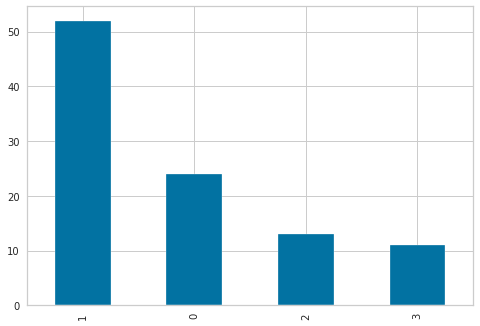

In [76]:
counts.plot.bar()

### Choosing K: The Silhouette Method

There exists another method that measures how well each datapoint $x_i$ "fits" its assigned cluster *and also* how poorly it fits into other clusters. This is a different way of looking at the same objective. Denote $a_{x_i}$ as the *average* distance from $x_i$ to all other points within its own cluster $k$. The lower the value, the better. On the other hand $b_{x_i}$ is the minimum average distance from $x_i$ to points in a different cluster, minimized over clusters. That is, compute separately for each cluster the average distance from $x_i$ to the points within that cluster, and then take the minimum. The silhouette $s(x_i)$ is defined as

$$s(x_i) = \frac{b_{x_i} - a_{x_i}}{\max{\left( a_{x_i}, b_{x_i}\right)}}$$

The silhouette score is computed on *every datapoint in every cluster*. The silhouette score ranges from -1 (a poor clustering) to +1 (a very dense clustering) with 0 denoting the situation where clusters overlap. Some criteria for the silhouette coefficient is provided in the table below.

<pre>

| Range       | Interpretation                                |
|-------------|-----------------------------------------------|
| 0.71 - 1.0  | A strong structure has been found.            |
| 0.51 - 0.7  | A reasonable structure has been found.        |
| 0.26 - 0.5  | The structure is weak and could be artificial.|
| < 0.25      | No substantial structure has been found.      |

</pre>
Source: http://www.stat.berkeley.edu/~spector/s133/Clus.html

Fortunately, scikit-learn provides a function to compute this for us (phew!) called [`sklearn.metrics.silhouette_score`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html). Take a look at [this article](http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html) on picking $K$ in scikit-learn, as it will help you in the next exercise set.

<div class="span5 alert alert-info">
<h3>Checkup Exercise Set III</h3>

<p><b>Exercise:</b> Using the documentation for the `silhouette_score` function above, construct a series of silhouette plots like the ones in the article linked above.</p>

<p><b>Exercise:</b> Compute the average silhouette score for each $K$ and plot it. What $K$ does the plot suggest we should choose? Does it differ from what we found using the Elbow method?</p>
</div>

In [86]:
#silhouette_avg = silhouette_score(X, cluster_labels)
#kmeans[2].labels_

array([1, 0, 2, 1, 0, 0, 2, 1, 0, 1, 0, 2, 1, 0, 1, 2, 0, 2, 1, 0, 1, 1,
       0, 0, 2, 0, 0, 0, 0, 2, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 2, 2, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 2, 2, 0, 1, 2, 1, 1, 0, 0, 1, 0, 1, 1, 2,
       2, 0, 0, 0, 0, 0, 0, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 2, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0], dtype=int32)

Automatically created module for IPython interactive environment
For n_clusters = 2 The average silhouette_score is : 0.09174871508750351


/home/brandon/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


For n_clusters = 3 The average silhouette_score is : 0.11889942863638556
For n_clusters = 4 The average silhouette_score is : 0.11889403812514514
For n_clusters = 5 The average silhouette_score is : 0.11672679268895196
For n_clusters = 6 The average silhouette_score is : 0.1237458143766428
For n_clusters = 7 The average silhouette_score is : 0.11204984048258261
For n_clusters = 8 The average silhouette_score is : 0.12782148103402702
For n_clusters = 9 The average silhouette_score is : 0.12208585069453584
For n_clusters = 10 The average silhouette_score is : 0.12562012200532716
For n_clusters = 11 The average silhouette_score is : 0.11684919463851832
For n_clusters = 12 The average silhouette_score is : 0.1397040912925488
For n_clusters = 13 The average silhouette_score is : 0.14039887916510085
For n_clusters = 14 The average silhouette_score is : 0.12453204419382846
For n_clusters = 15 The average silhouette_score is : 0.15013732757188306
For n_clusters = 16 The average silhouette_scor

/home/brandon/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/home/brandon/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


For n_clusters = 22 The average silhouette_score is : 0.142332015138988
For n_clusters = 23 The average silhouette_score is : 0.13482700169082965


/home/brandon/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


For n_clusters = 24 The average silhouette_score is : 0.1392925988523539


/home/brandon/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


For n_clusters = 25 The average silhouette_score is : 0.14325306215093359


/home/brandon/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/home/brandon/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


For n_clusters = 26 The average silhouette_score is : 0.13128832002557558
For n_clusters = 27 The average silhouette_score is : 0.1529175684288128


/home/brandon/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/home/brandon/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


For n_clusters = 28 The average silhouette_score is : 0.1308434167911569
For n_clusters = 29 The average silhouette_score is : 0.14951061871790952


/home/brandon/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/home/brandon/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


For n_clusters = 30 The average silhouette_score is : 0.13953115054156012
For n_clusters = 31 The average silhouette_score is : 0.14038981452328078


/home/brandon/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


For n_clusters = 32 The average silhouette_score is : 0.1258407877505427


/home/brandon/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


For n_clusters = 33 The average silhouette_score is : 0.1600199094159648


/home/brandon/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


For n_clusters = 34 The average silhouette_score is : 0.13367206101662668


/home/brandon/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


For n_clusters = 35 The average silhouette_score is : 0.12888221593222282


/home/brandon/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


For n_clusters = 36 The average silhouette_score is : 0.1455957863097956


/home/brandon/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


For n_clusters = 37 The average silhouette_score is : 0.1437271188269308


/home/brandon/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


For n_clusters = 38 The average silhouette_score is : 0.14777972144960994


/home/brandon/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


For n_clusters = 39 The average silhouette_score is : 0.14830812014276737


/home/brandon/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


For n_clusters = 40 The average silhouette_score is : 0.1533631500000329


/home/brandon/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


For n_clusters = 41 The average silhouette_score is : 0.15354753864598672


/home/brandon/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


For n_clusters = 42 The average silhouette_score is : 0.15068937097654303


/home/brandon/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


For n_clusters = 43 The average silhouette_score is : 0.16700891629917136


/home/brandon/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


For n_clusters = 44 The average silhouette_score is : 0.16803149492482125


/home/brandon/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


For n_clusters = 45 The average silhouette_score is : 0.15841620848563961


/home/brandon/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


For n_clusters = 46 The average silhouette_score is : 0.1586694738625506


/home/brandon/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


For n_clusters = 47 The average silhouette_score is : 0.139880801884305


/home/brandon/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


For n_clusters = 48 The average silhouette_score is : 0.15627984086499797


/home/brandon/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


For n_clusters = 49 The average silhouette_score is : 0.1552434395250325


/home/brandon/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


For n_clusters = 50 The average silhouette_score is : 0.16134853222644463


/home/brandon/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


For n_clusters = 51 The average silhouette_score is : 0.16040929763679102


/home/brandon/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


For n_clusters = 52 The average silhouette_score is : 0.14416255469534733


/home/brandon/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


For n_clusters = 53 The average silhouette_score is : 0.16105541260287867


/home/brandon/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


For n_clusters = 54 The average silhouette_score is : 0.15192986601947522


/home/brandon/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


For n_clusters = 55 The average silhouette_score is : 0.1697957942531289


/home/brandon/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


For n_clusters = 56 The average silhouette_score is : 0.1636280727059619


/home/brandon/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


For n_clusters = 57 The average silhouette_score is : 0.18075639459617843


/home/brandon/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


For n_clusters = 58 The average silhouette_score is : 0.19947768356010293


/home/brandon/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


For n_clusters = 59 The average silhouette_score is : 0.18187626849462846


/home/brandon/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


For n_clusters = 60 The average silhouette_score is : 0.19982663812562


/home/brandon/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


For n_clusters = 61 The average silhouette_score is : 0.16540764726276053


/home/brandon/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


For n_clusters = 62 The average silhouette_score is : 0.19439506780723678


/home/brandon/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


For n_clusters = 63 The average silhouette_score is : 0.19278496250405422


/home/brandon/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


For n_clusters = 64 The average silhouette_score is : 0.19628573959281653


/home/brandon/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


For n_clusters = 65 The average silhouette_score is : 0.22525396890405877


/home/brandon/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


For n_clusters = 66 The average silhouette_score is : 0.1847892872599855


/home/brandon/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


For n_clusters = 67 The average silhouette_score is : 0.19444716916135896


/home/brandon/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


For n_clusters = 68 The average silhouette_score is : 0.21533076770011203


/home/brandon/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


For n_clusters = 69 The average silhouette_score is : 0.21541208433495707


/home/brandon/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


For n_clusters = 70 The average silhouette_score is : 0.22979637853857293


/home/brandon/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


For n_clusters = 71 The average silhouette_score is : 0.21603814785143946


/home/brandon/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


For n_clusters = 72 The average silhouette_score is : 0.22127654775618918


/home/brandon/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


For n_clusters = 73 The average silhouette_score is : 0.2086634973531319


/home/brandon/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


For n_clusters = 74 The average silhouette_score is : 0.20288353122996658


/home/brandon/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


For n_clusters = 75 The average silhouette_score is : 0.19567534198844283


/home/brandon/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


For n_clusters = 76 The average silhouette_score is : 0.19675728386398667


/home/brandon/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


For n_clusters = 77 The average silhouette_score is : 0.19408598595931625


/home/brandon/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


For n_clusters = 78 The average silhouette_score is : 0.21025126265847086


/home/brandon/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


For n_clusters = 79 The average silhouette_score is : 0.1885570888343116


/home/brandon/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


For n_clusters = 80 The average silhouette_score is : 0.18852427344429848


/home/brandon/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


For n_clusters = 81 The average silhouette_score is : 0.1987306468999889


/home/brandon/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


For n_clusters = 82 The average silhouette_score is : 0.2022182540694798


/home/brandon/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


For n_clusters = 83 The average silhouette_score is : 0.19464466094067262


/home/brandon/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


For n_clusters = 84 The average silhouette_score is : 0.20636038969321072


/home/brandon/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


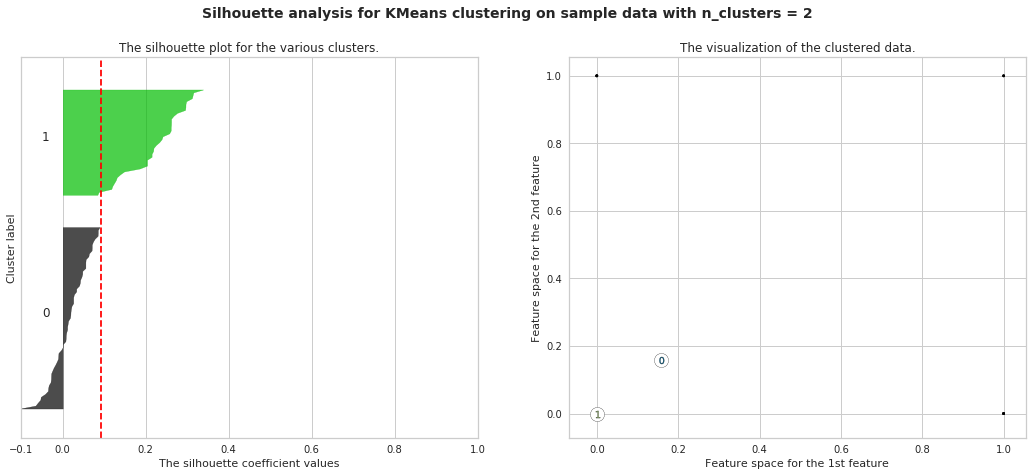

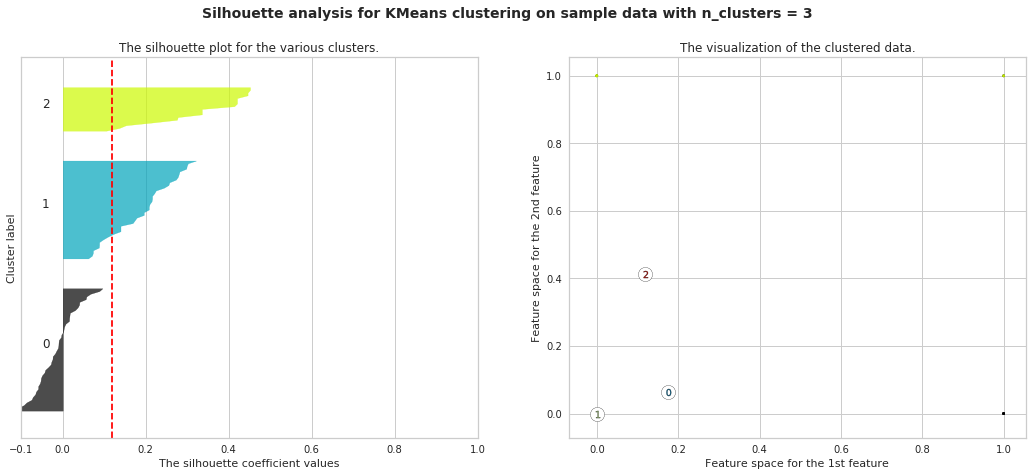

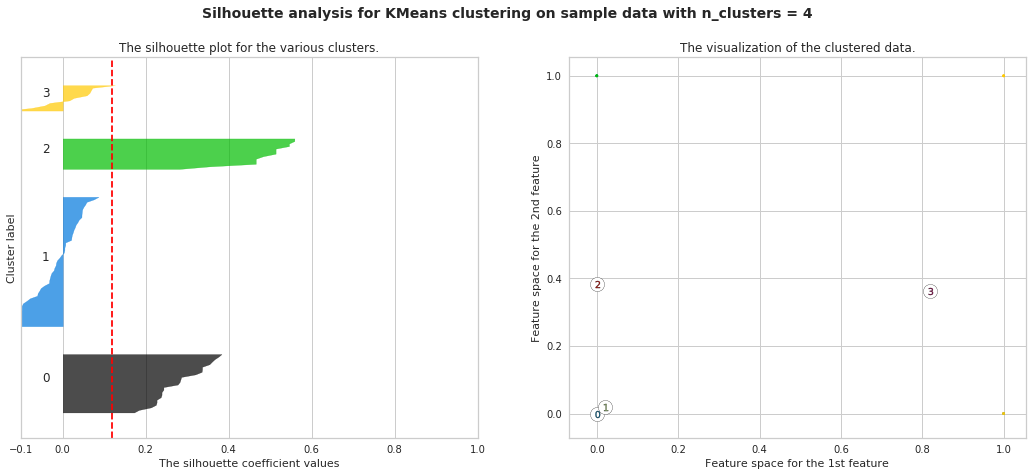

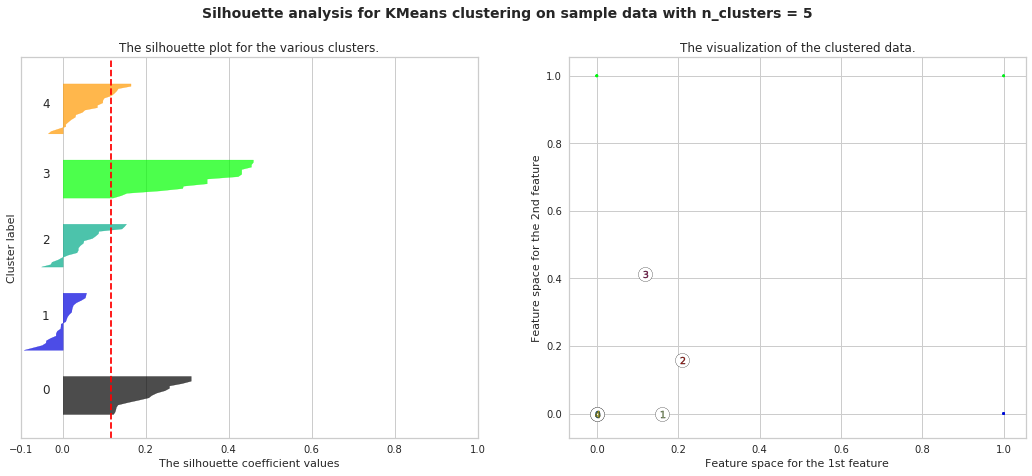

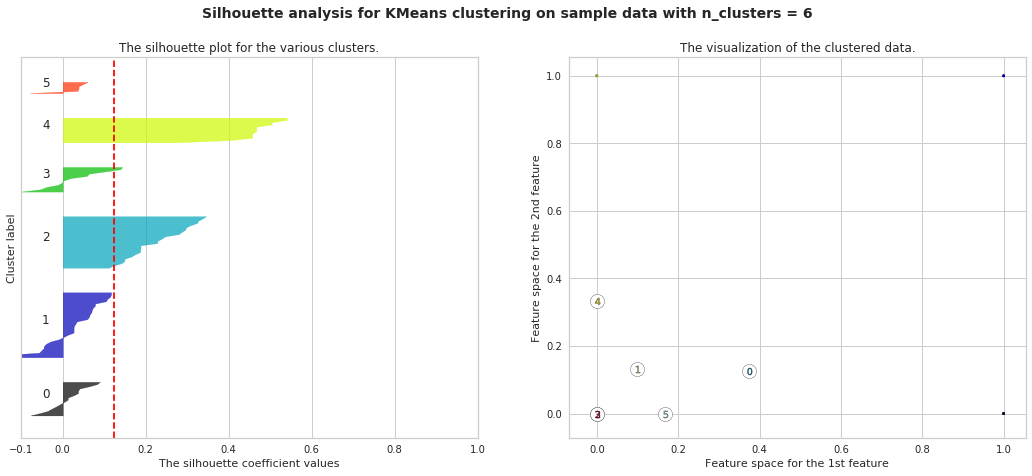

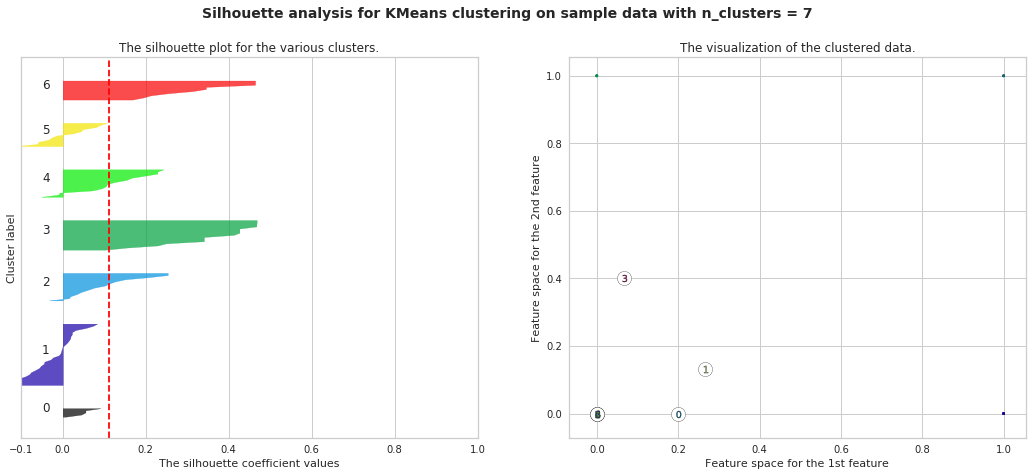

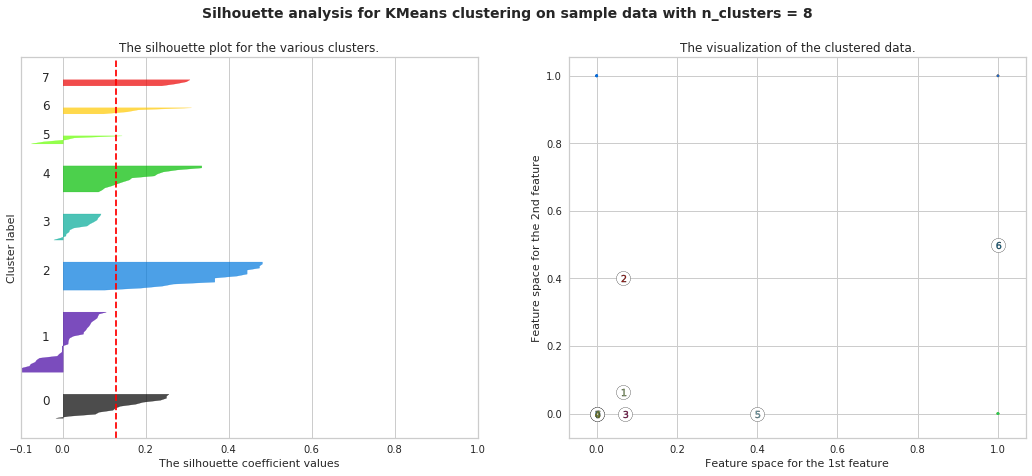

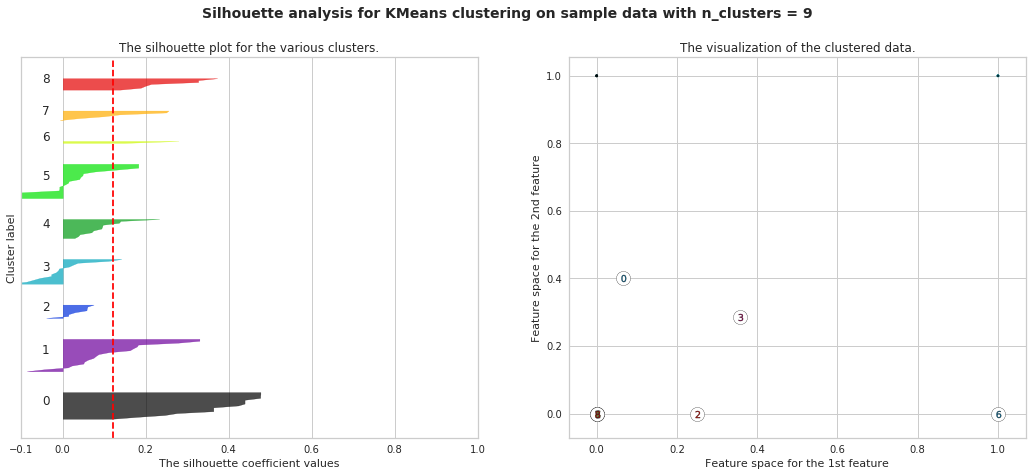

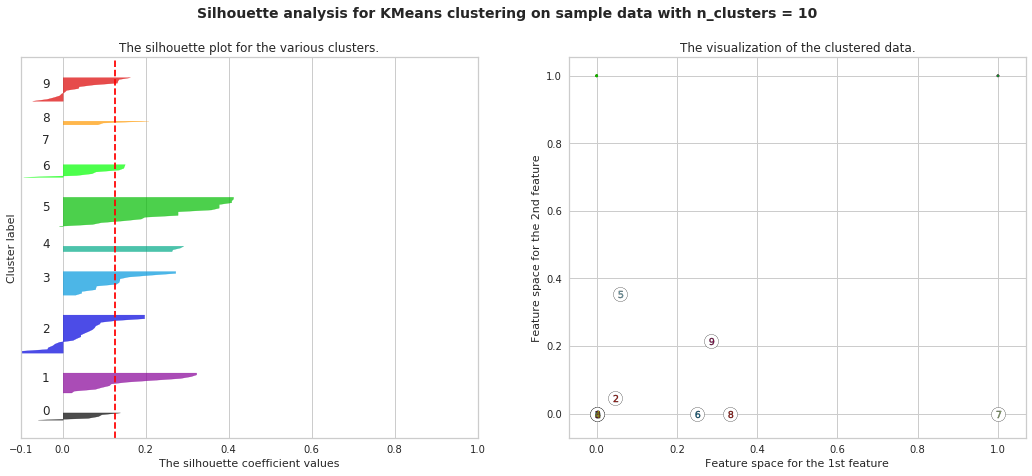

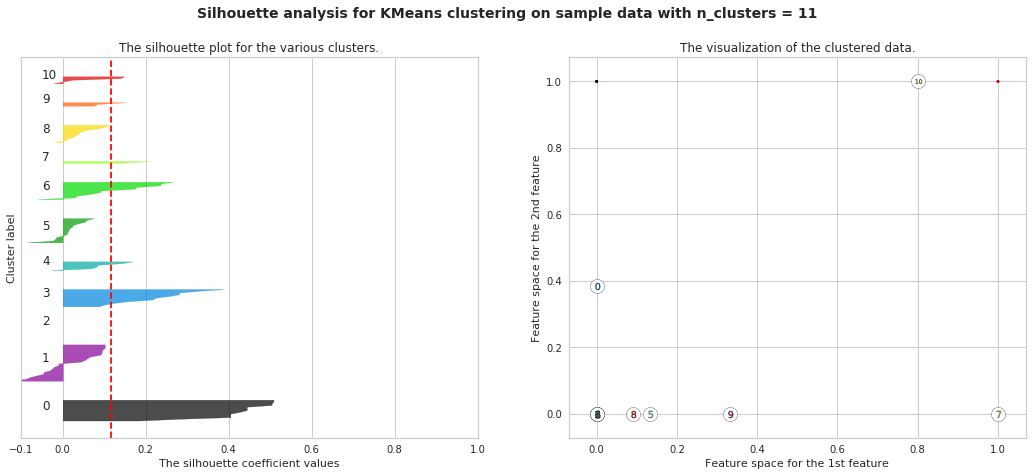

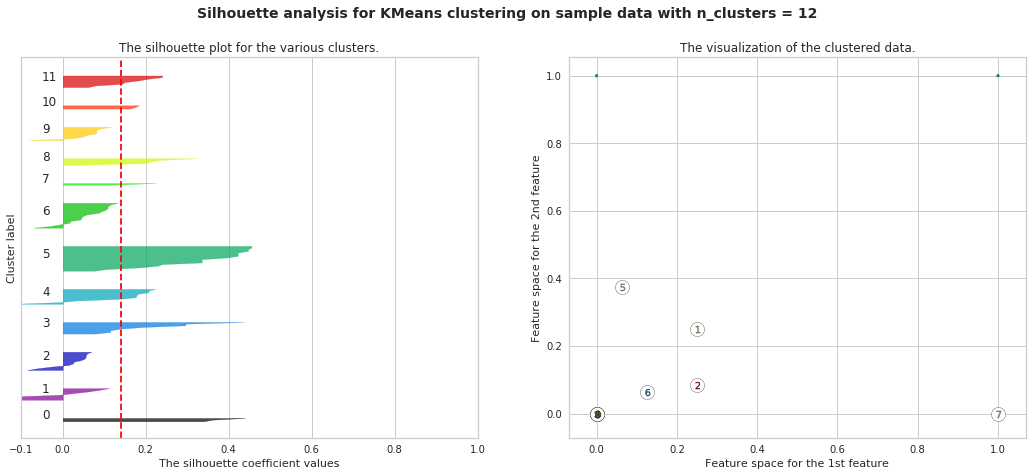

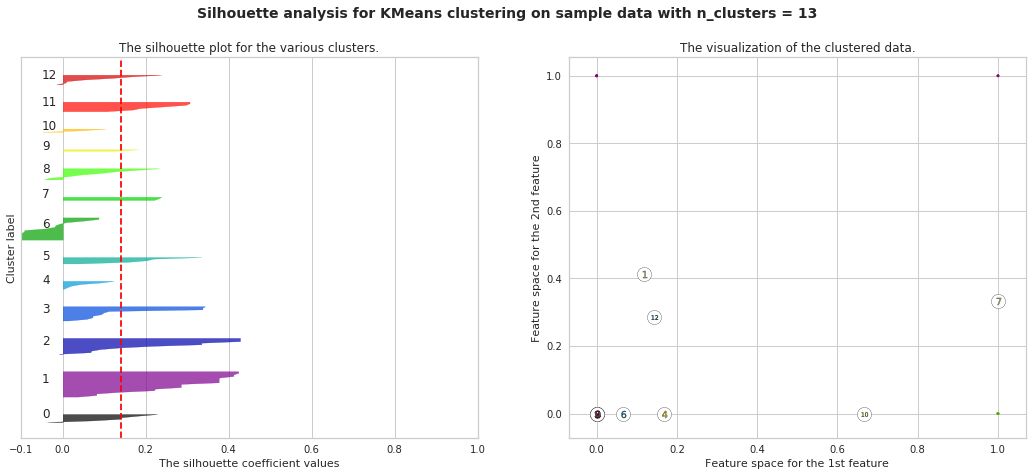

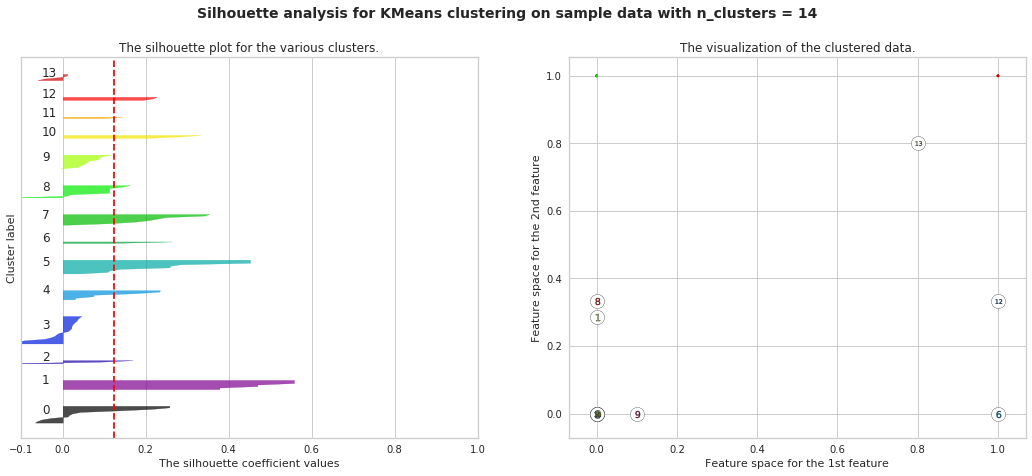

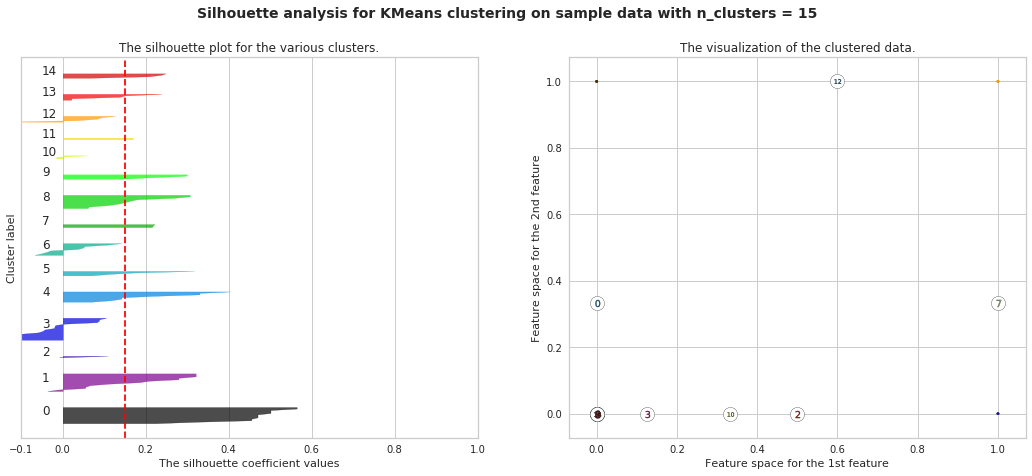

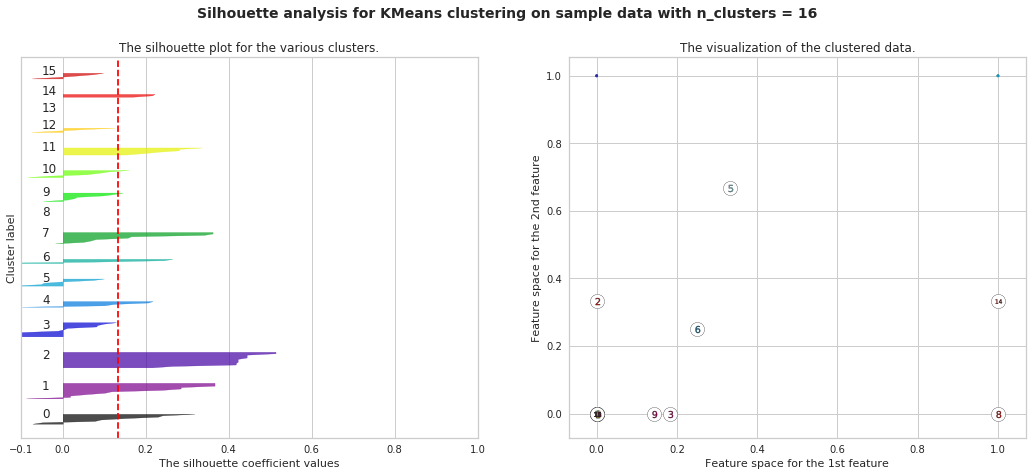

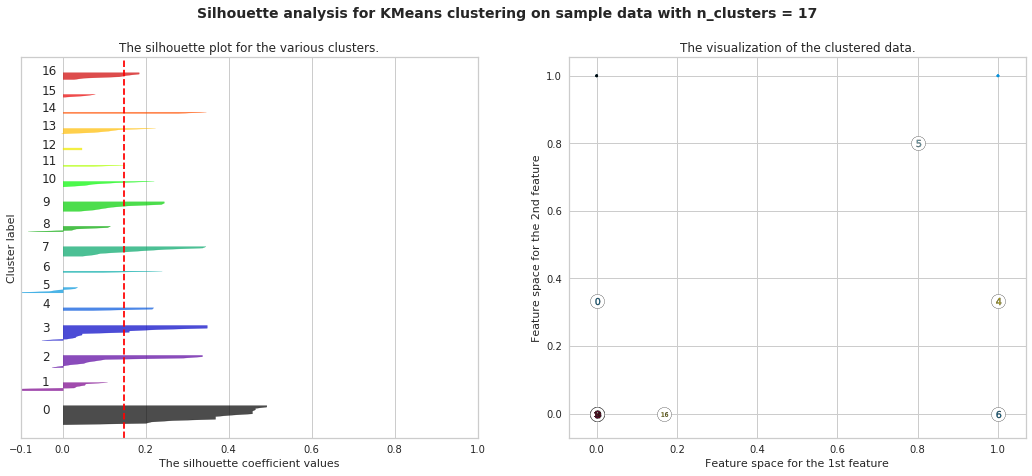

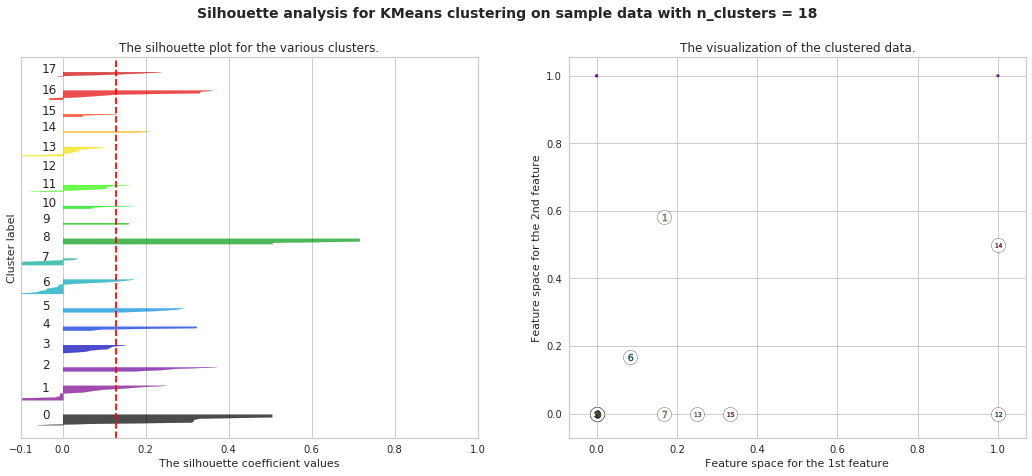

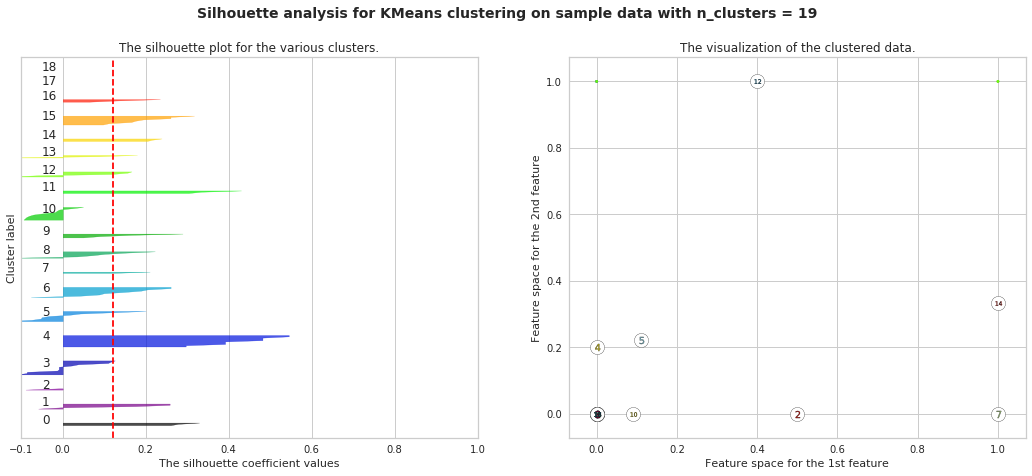

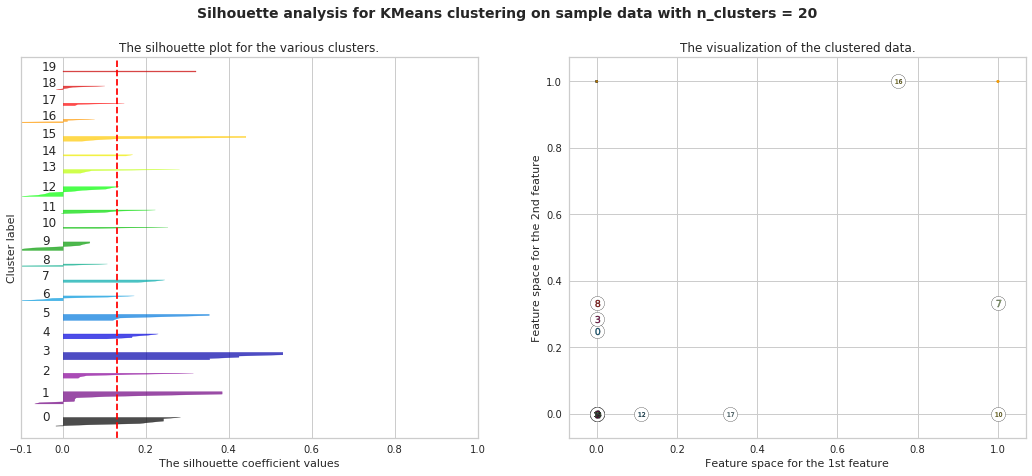

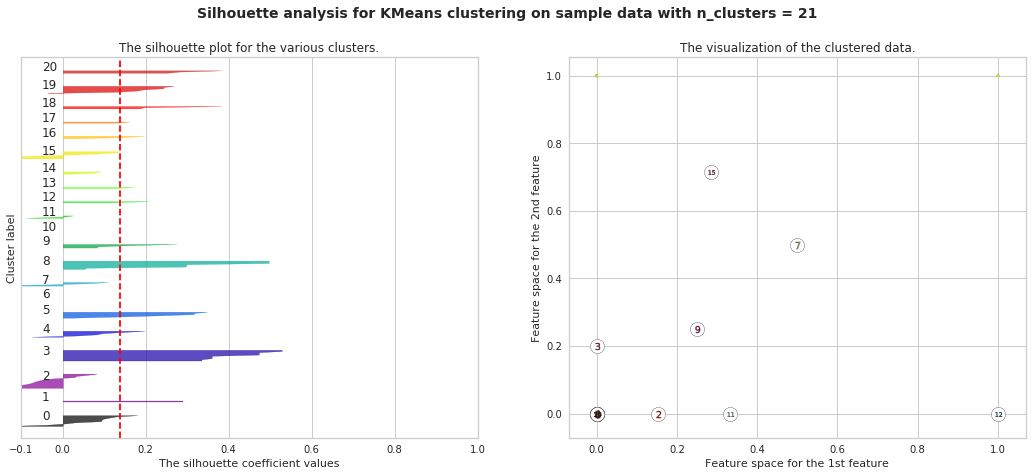

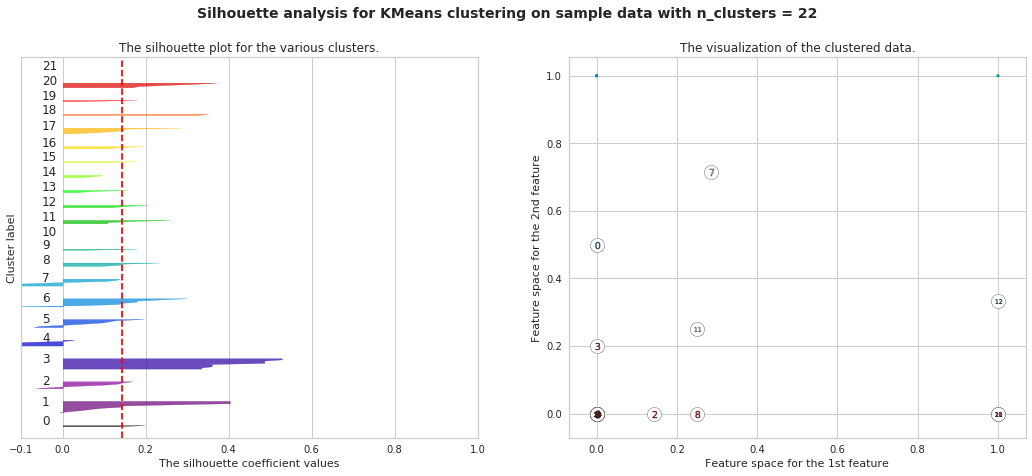

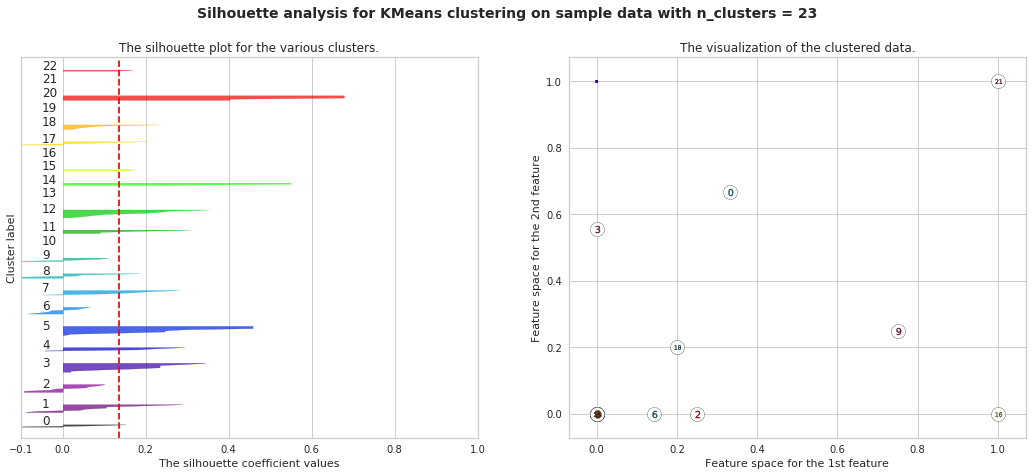

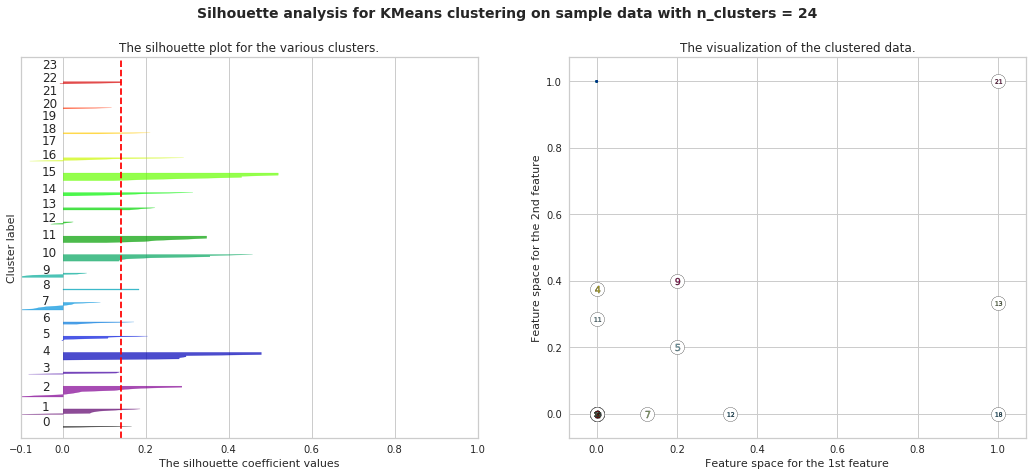

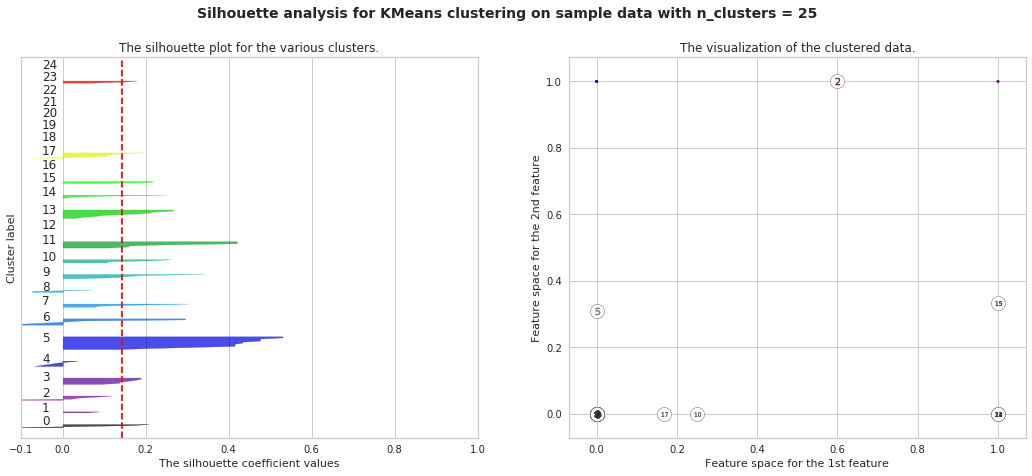

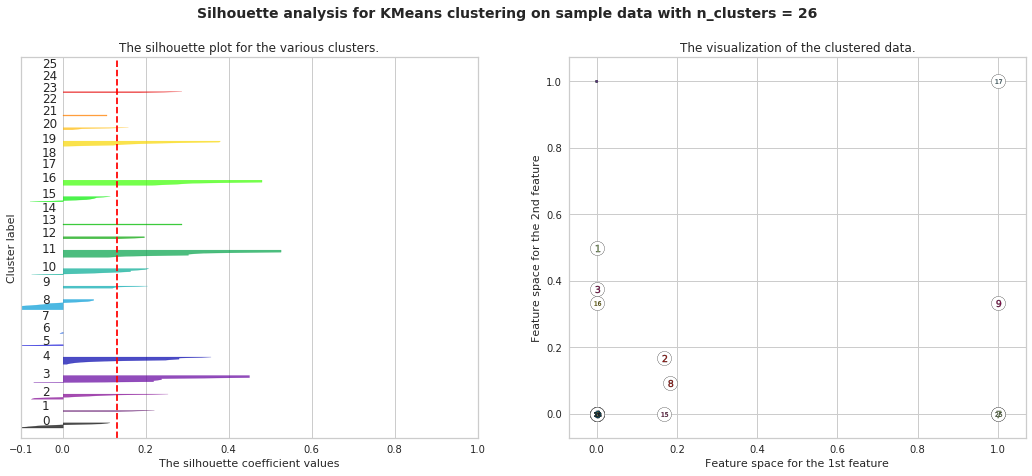

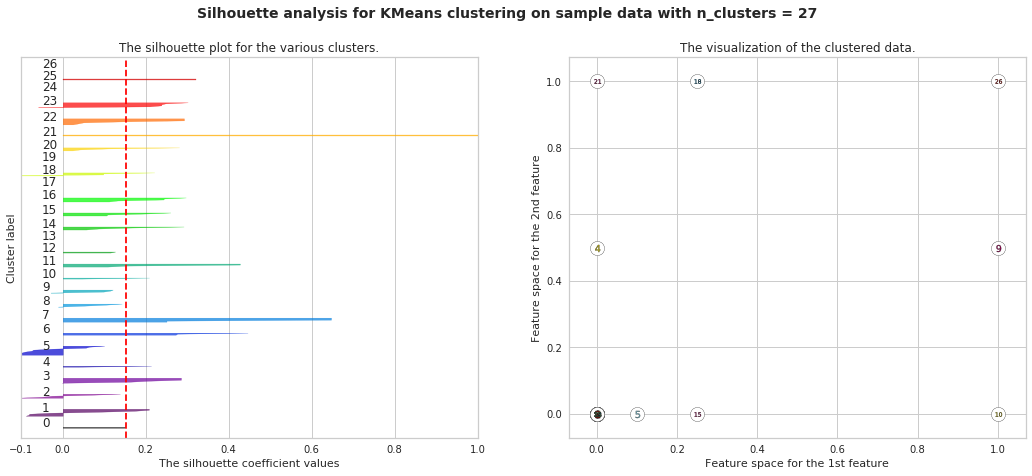

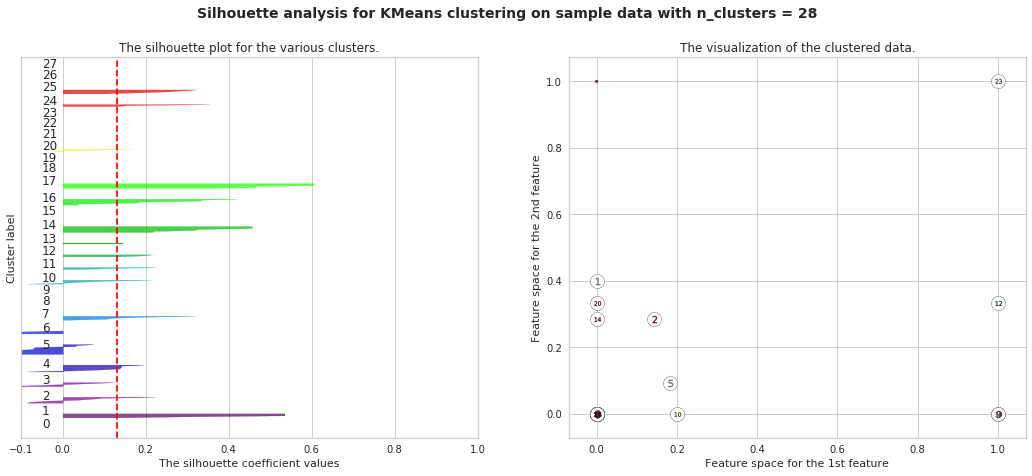

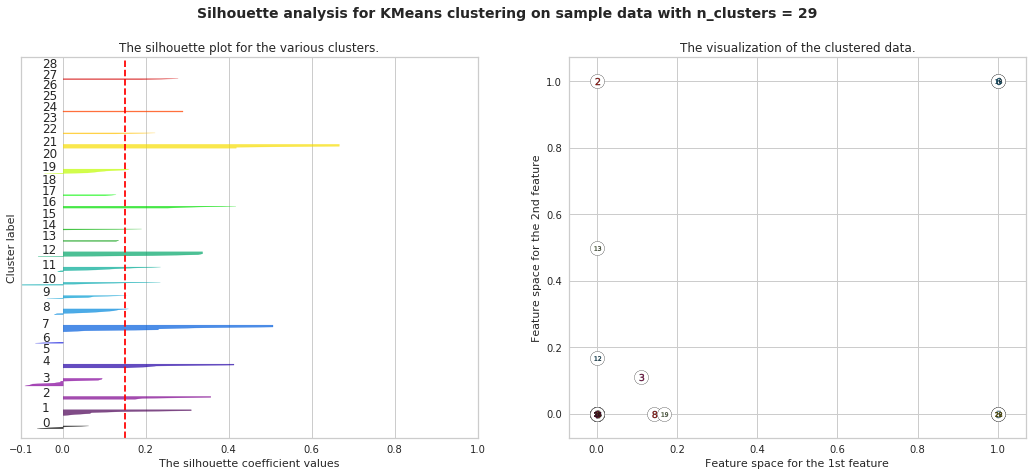

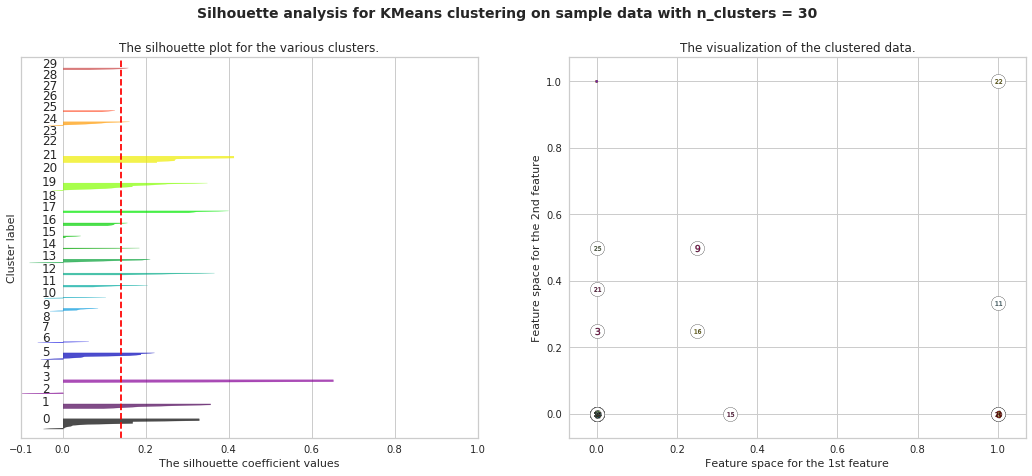

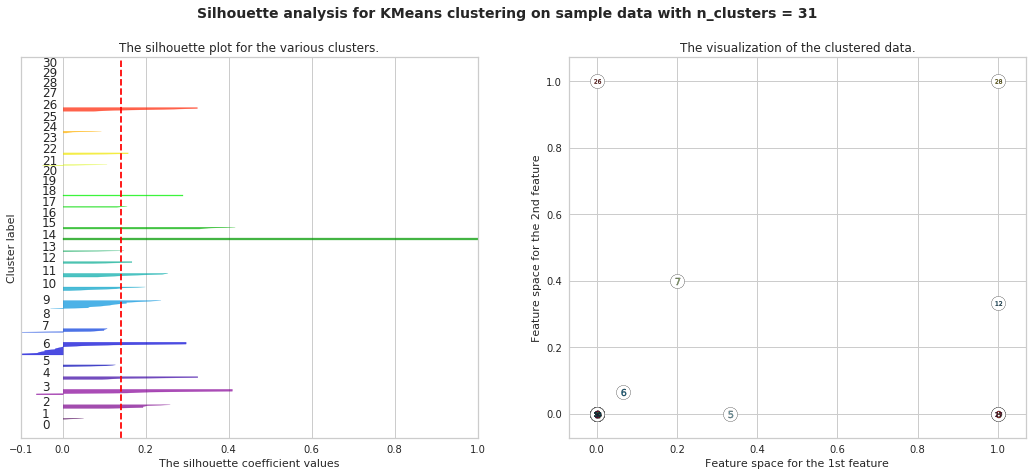

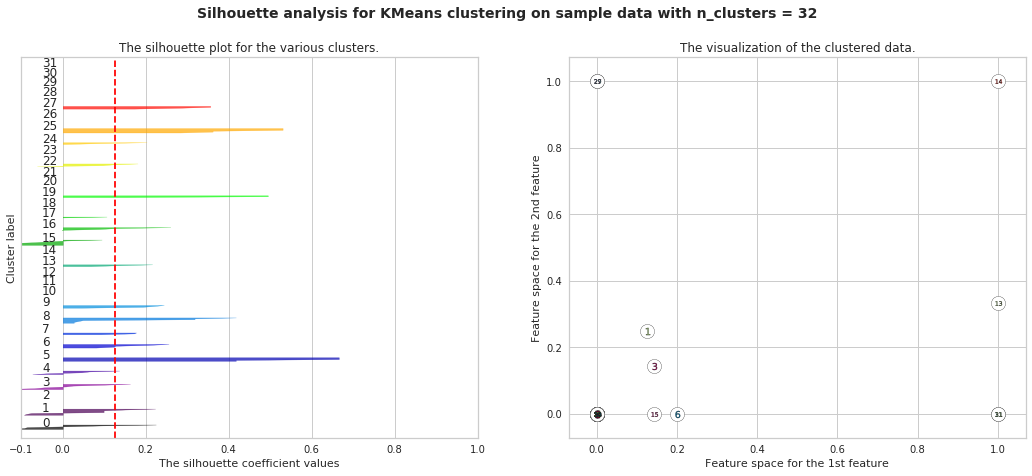

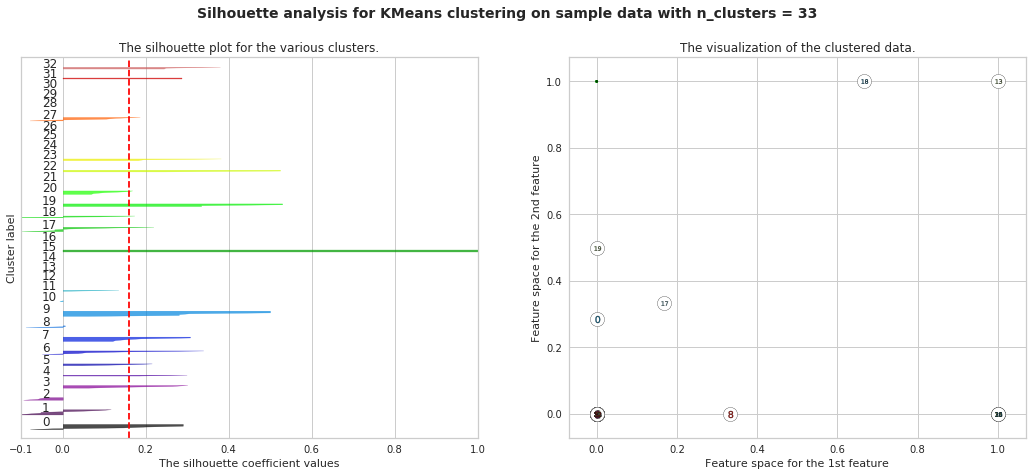

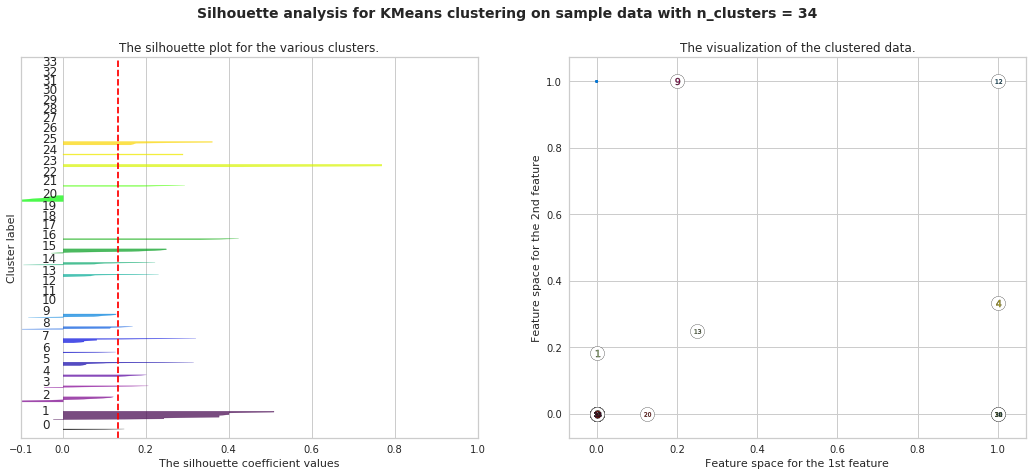

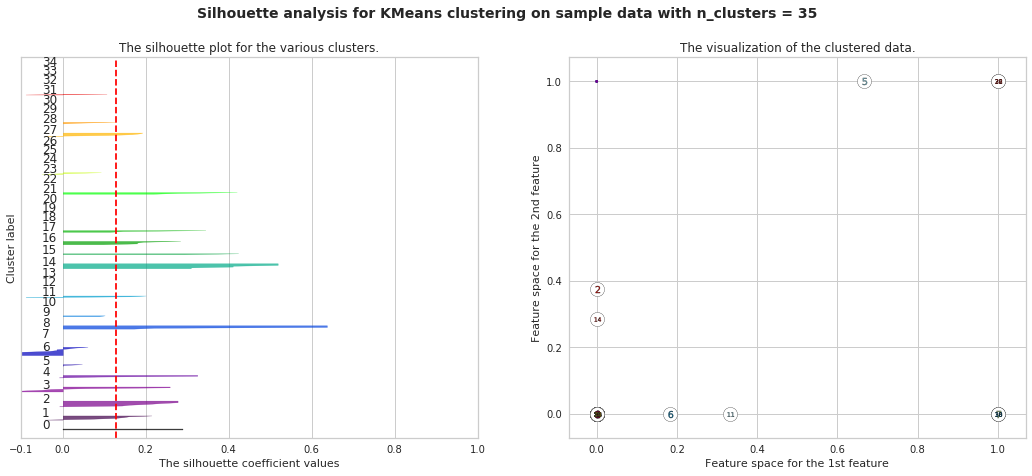

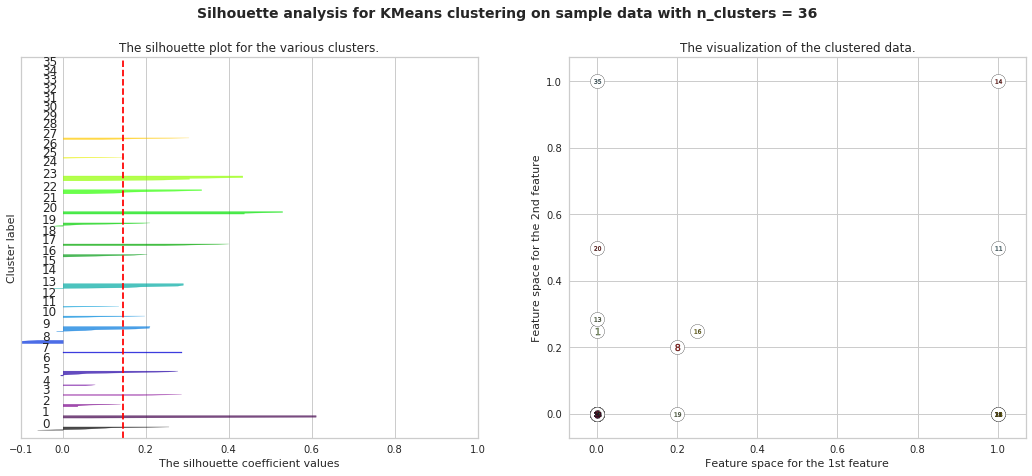

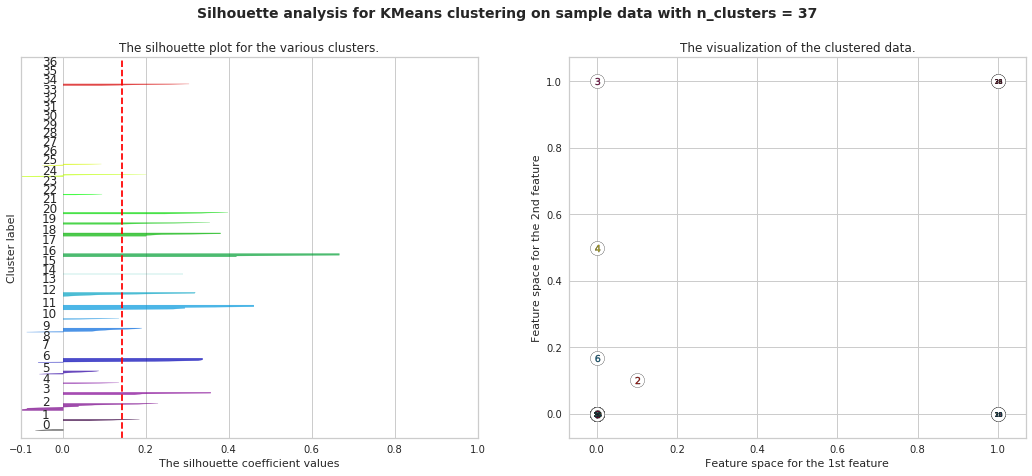

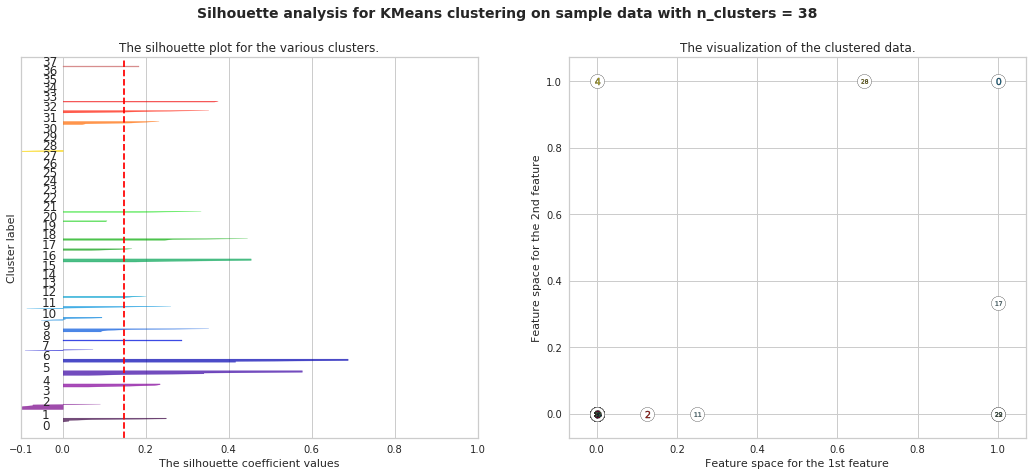

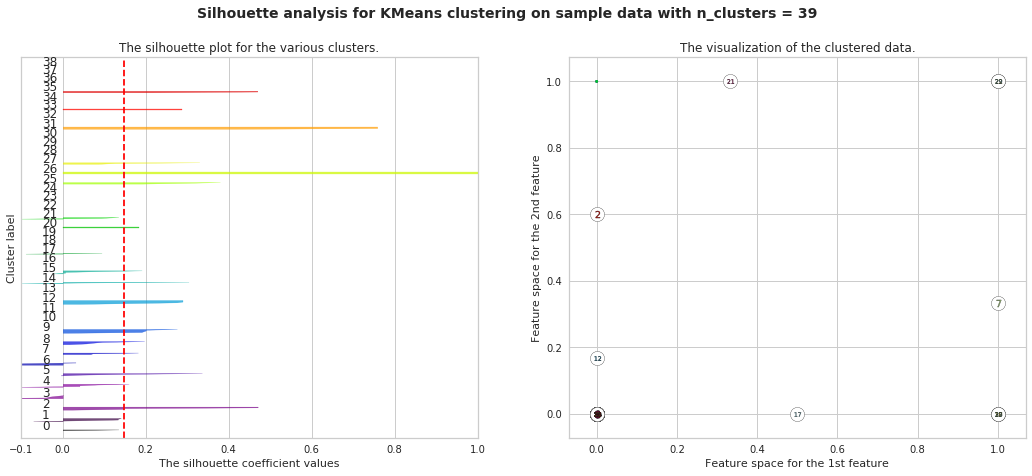

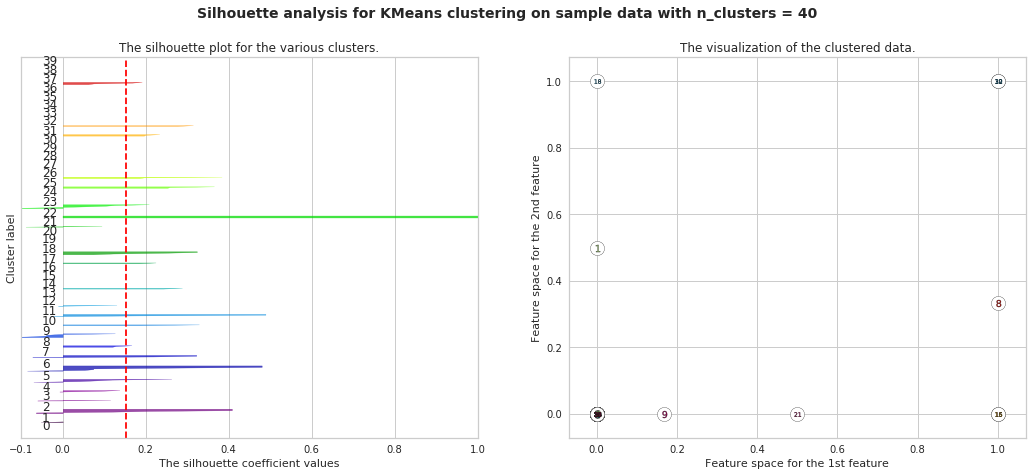

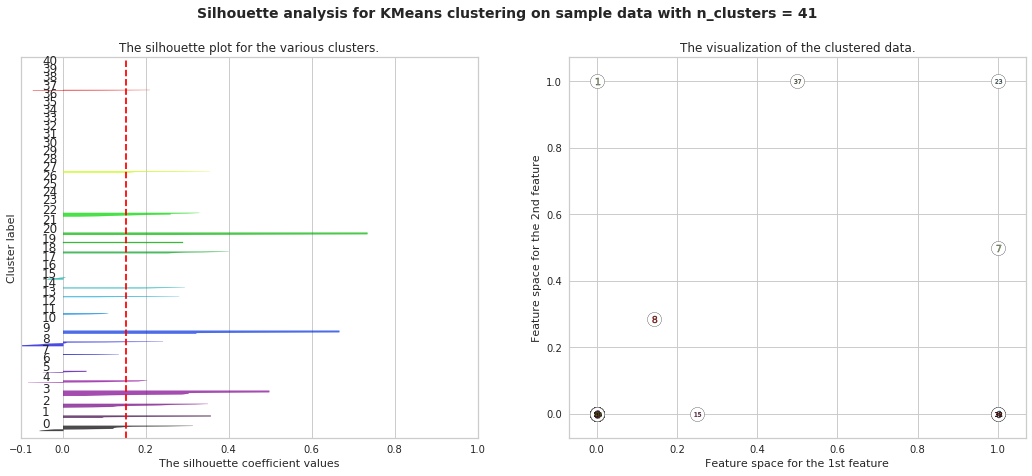

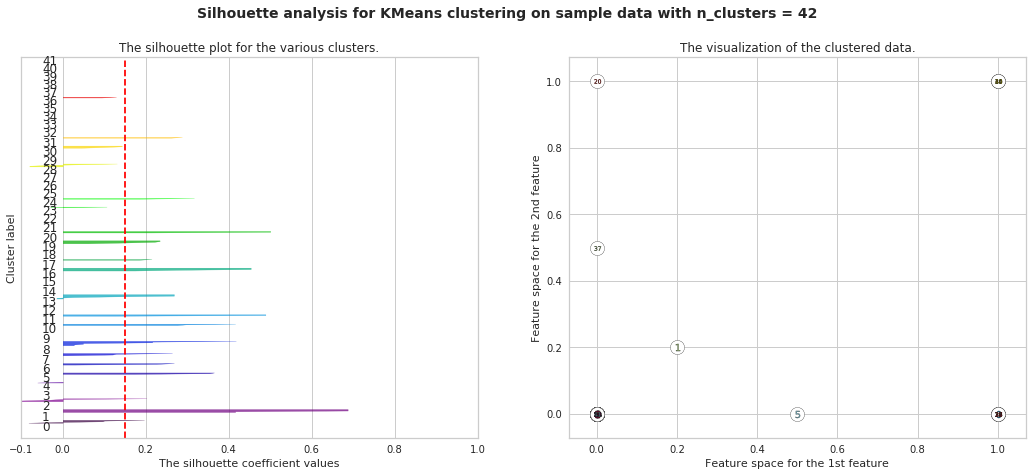

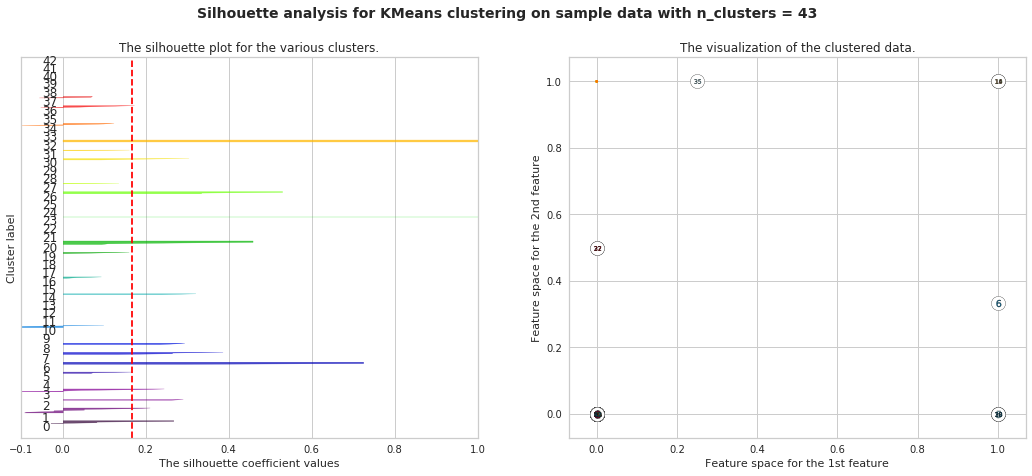

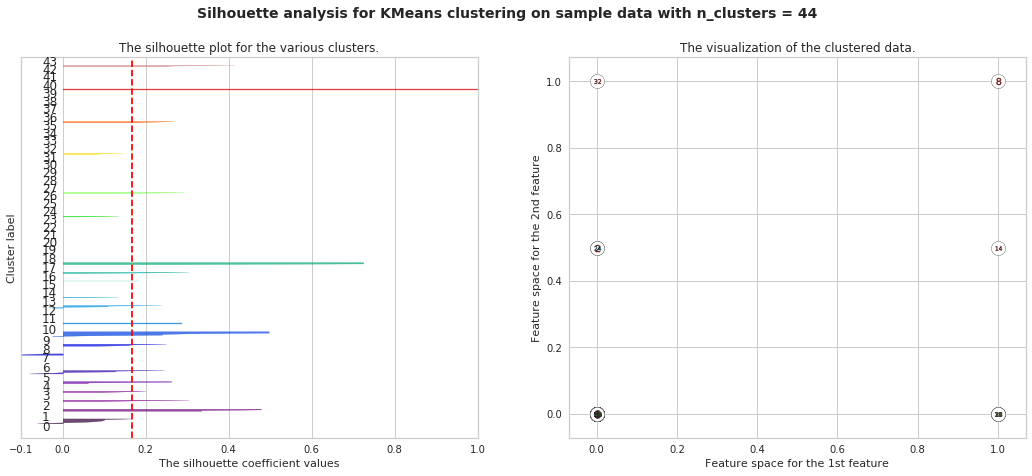

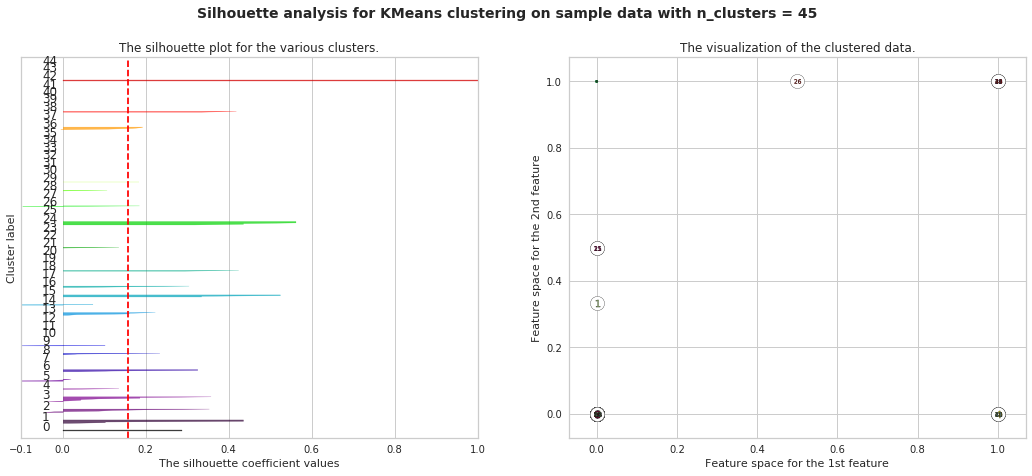

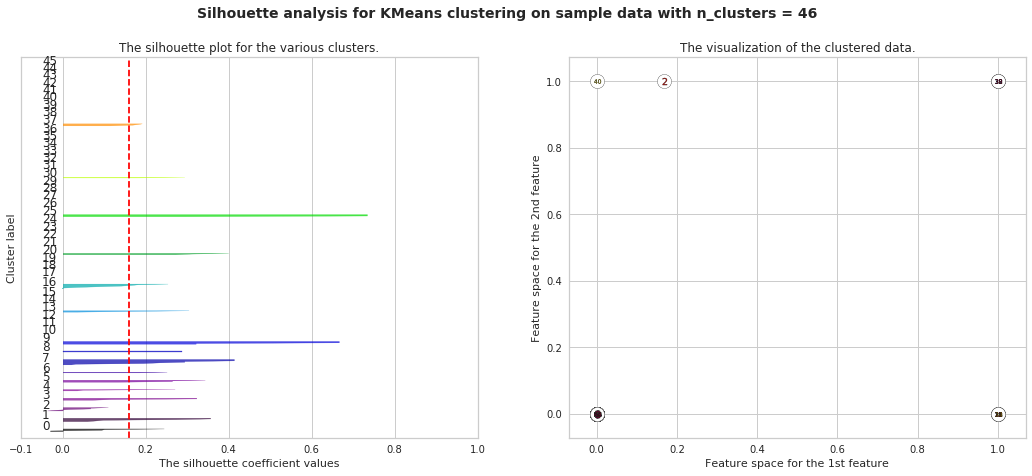

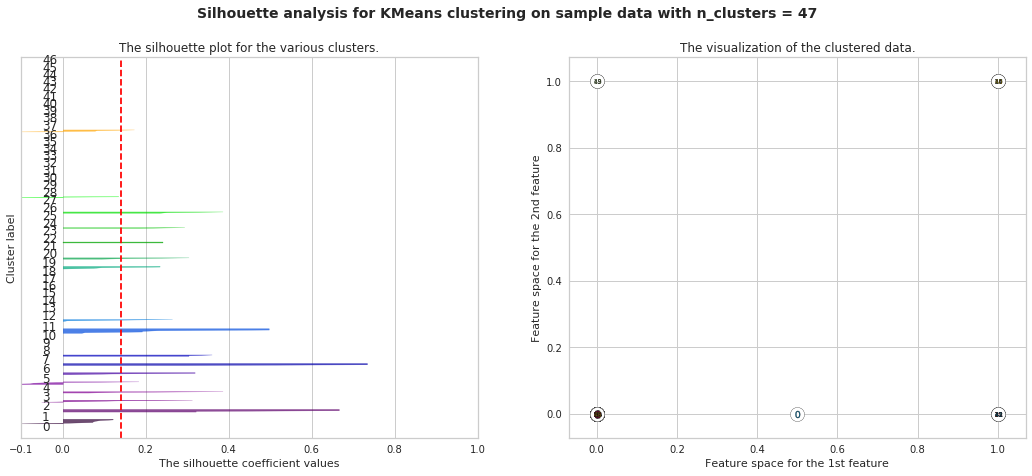

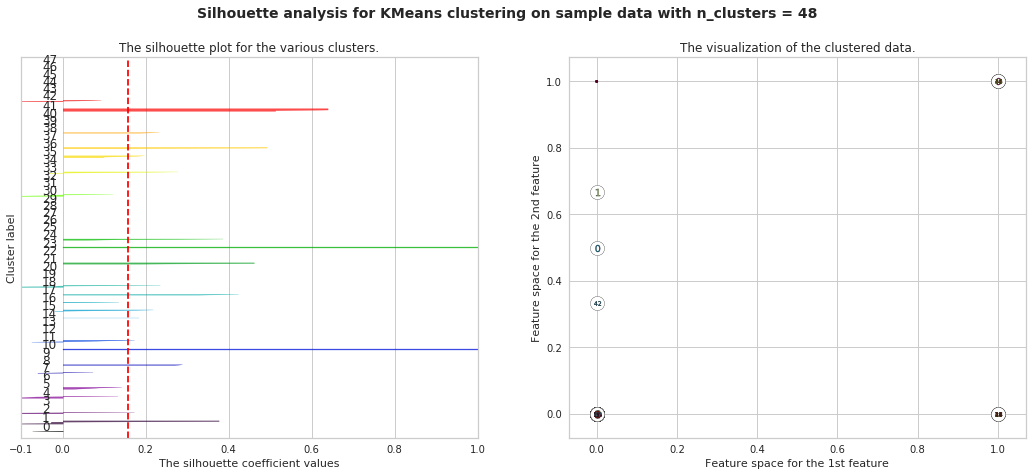

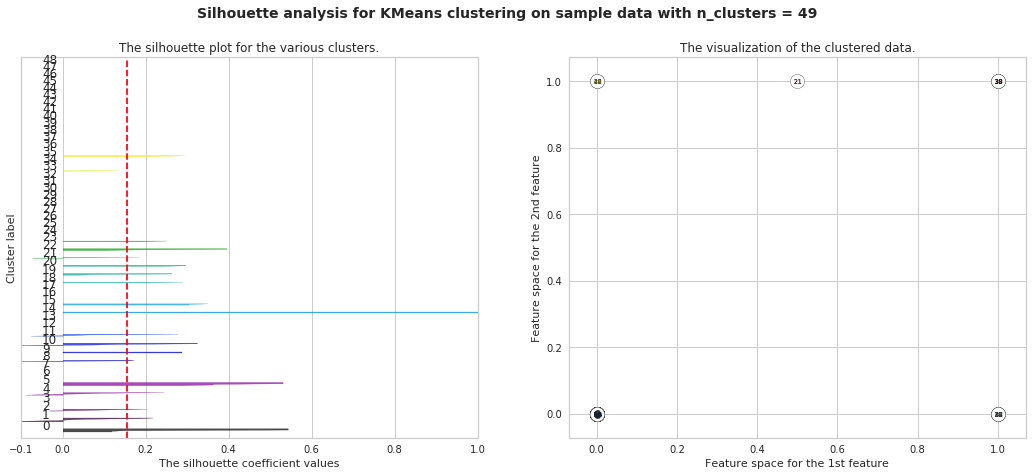

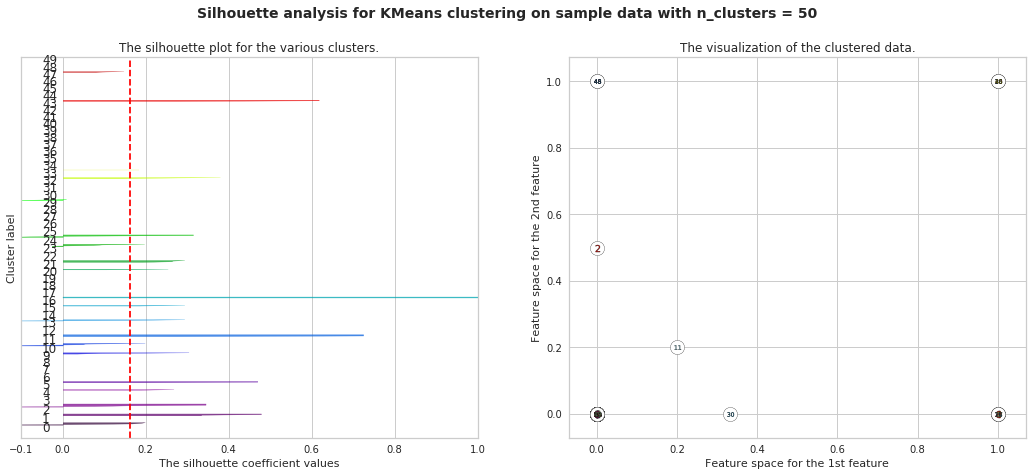

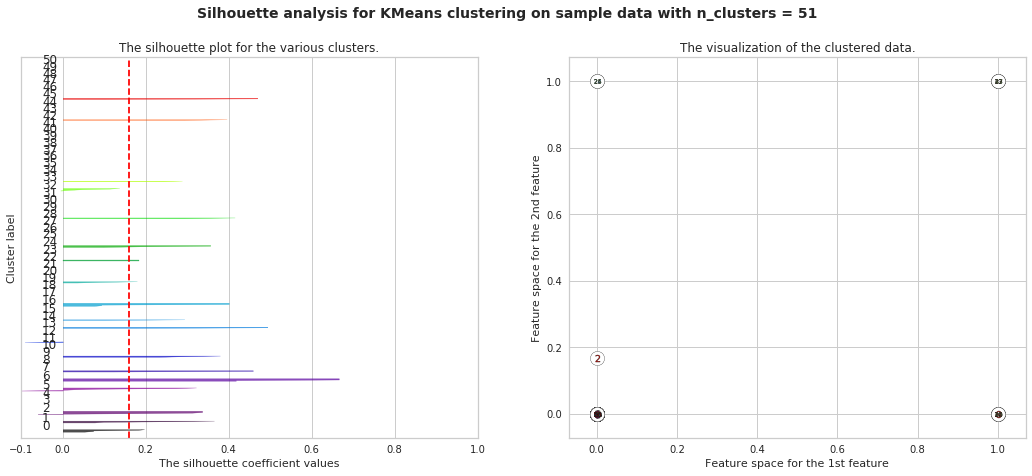

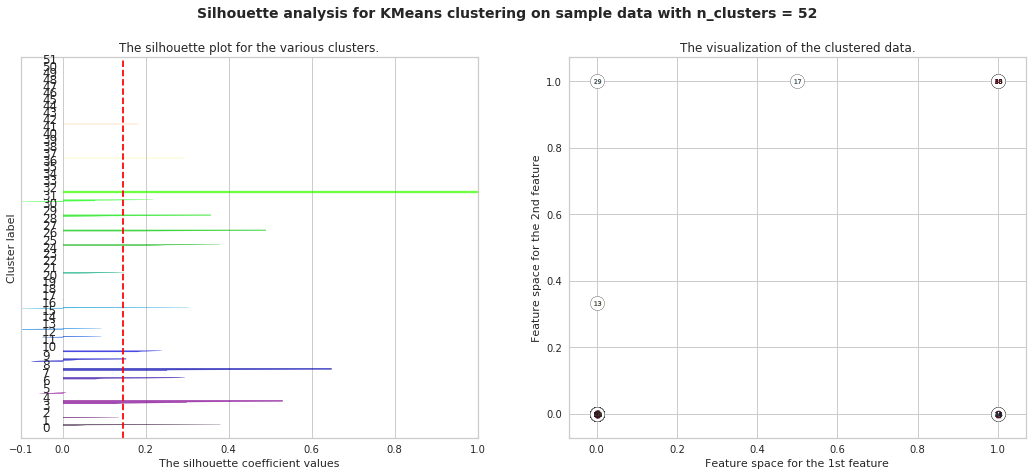

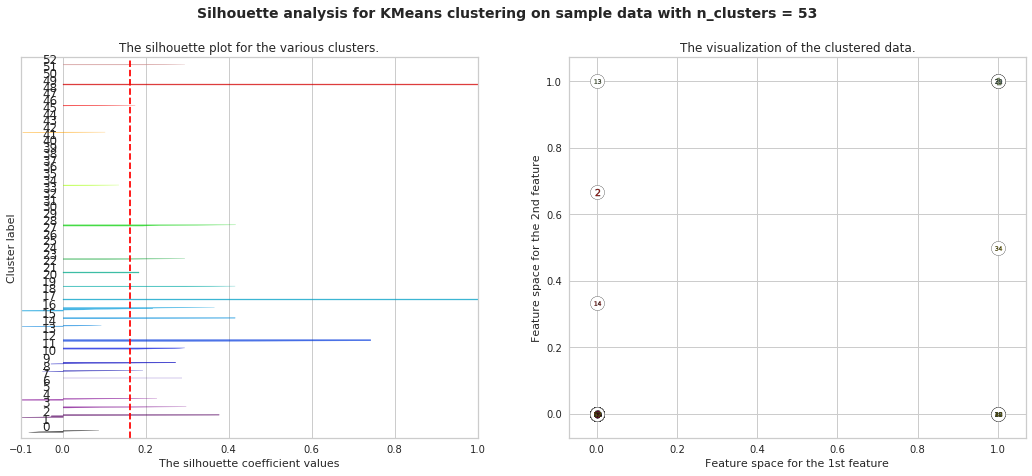

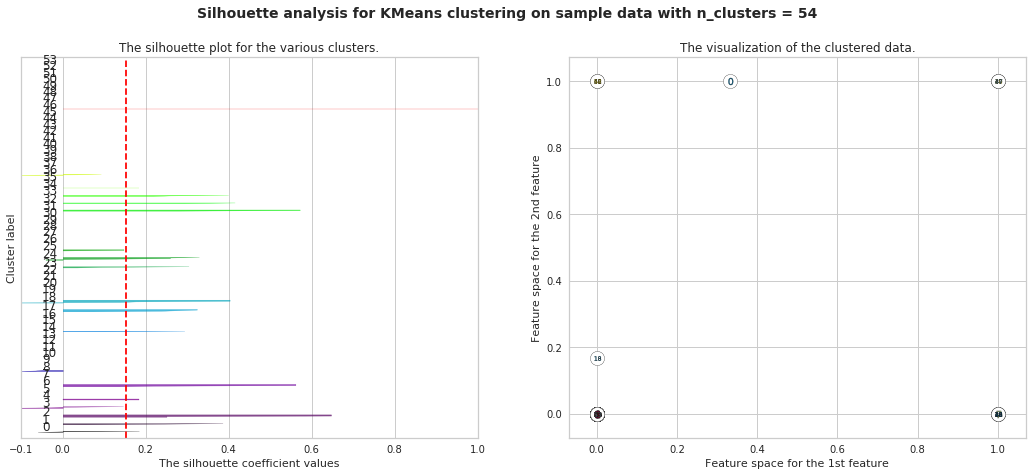

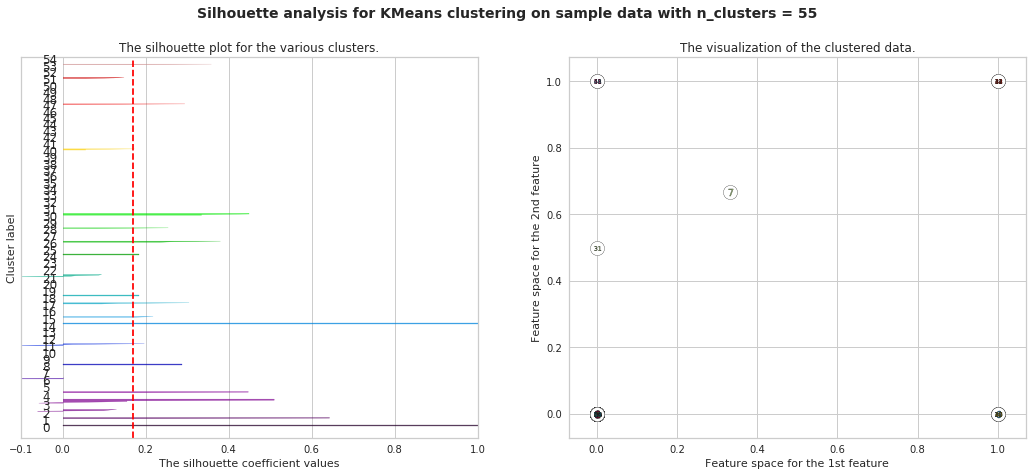

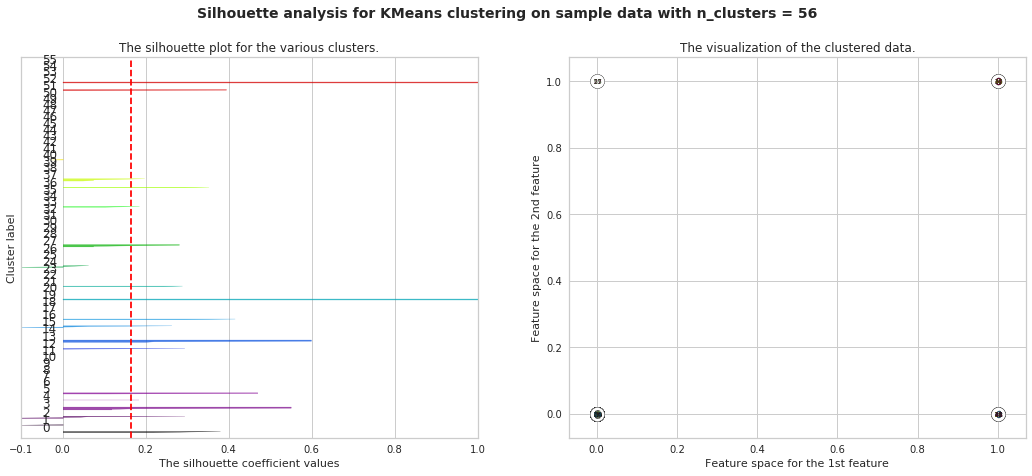

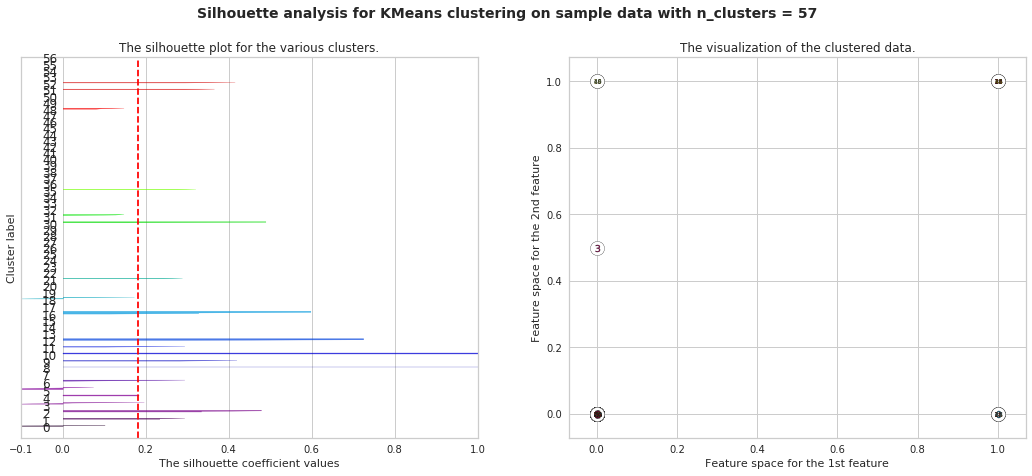

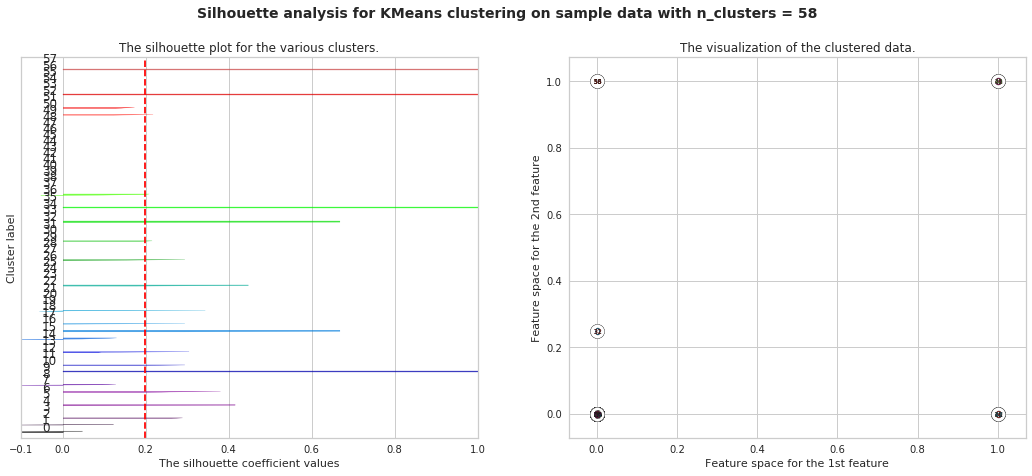

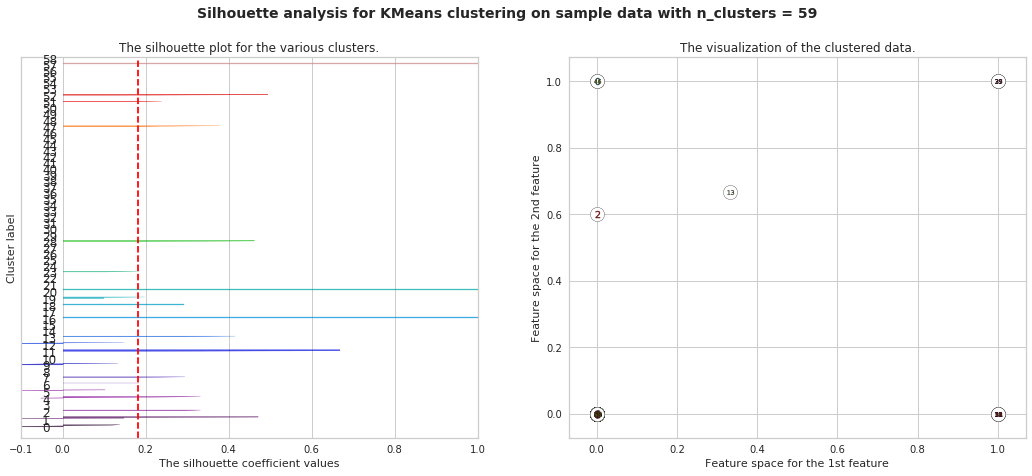

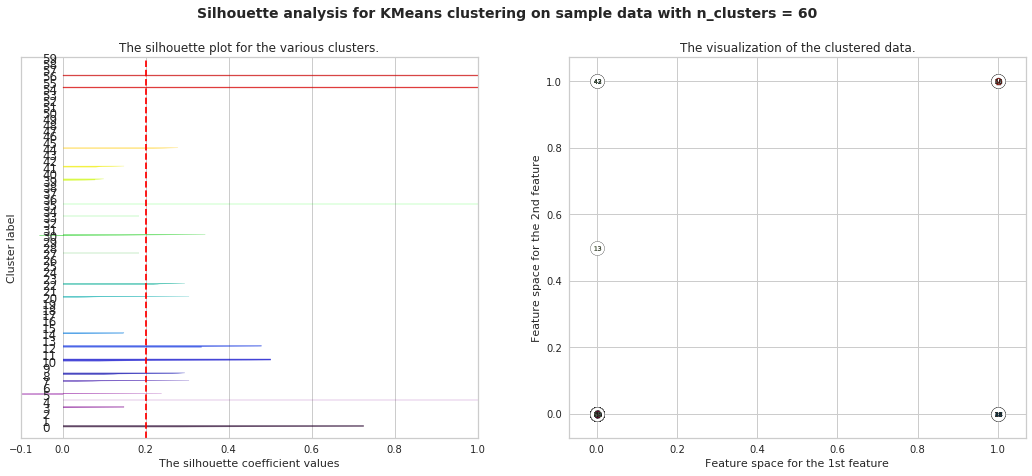

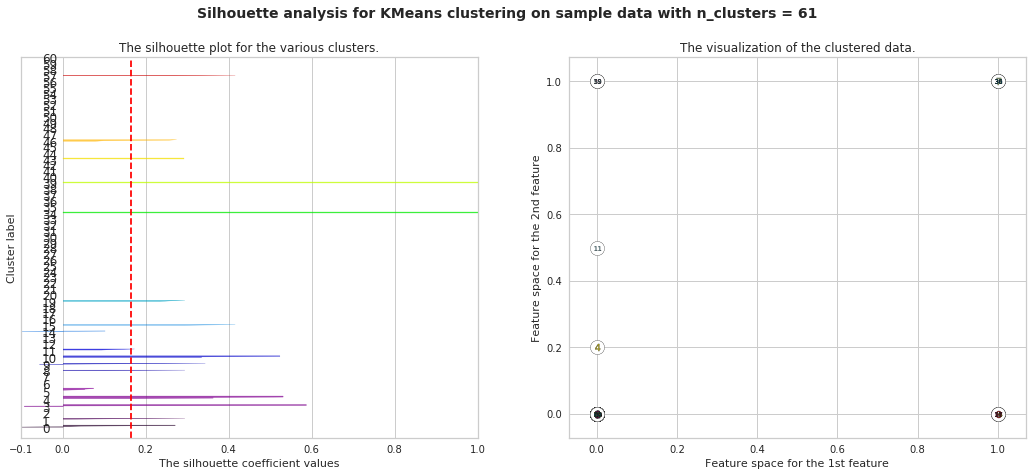

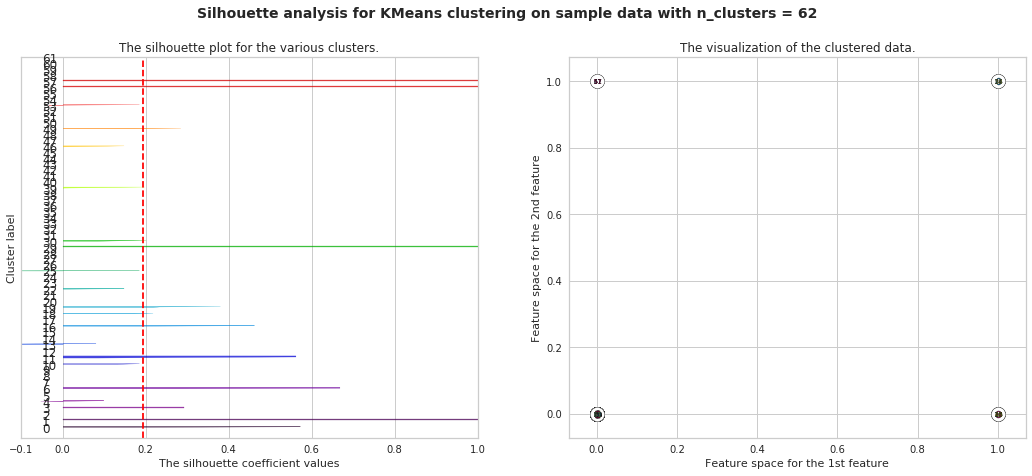

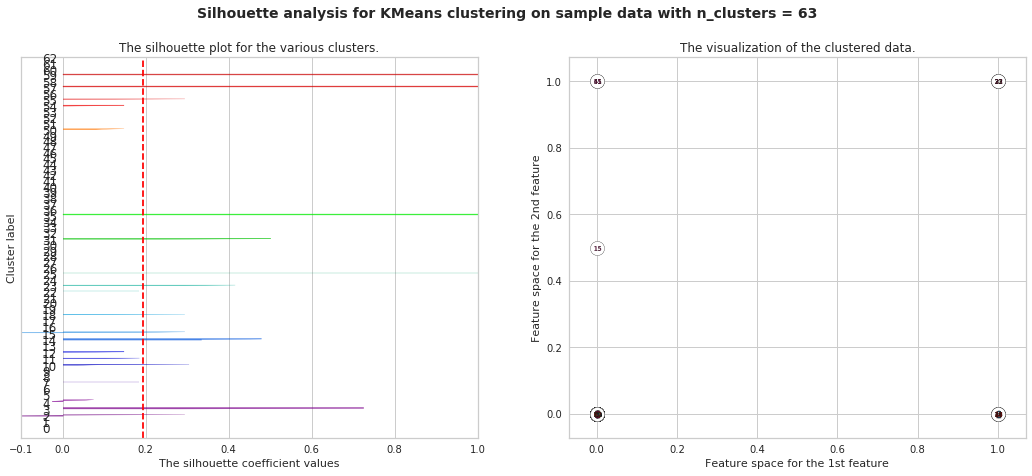

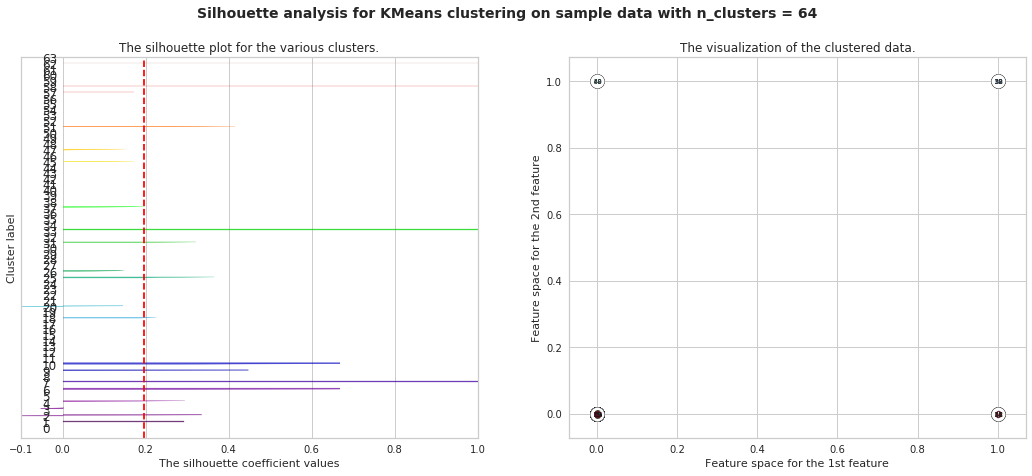

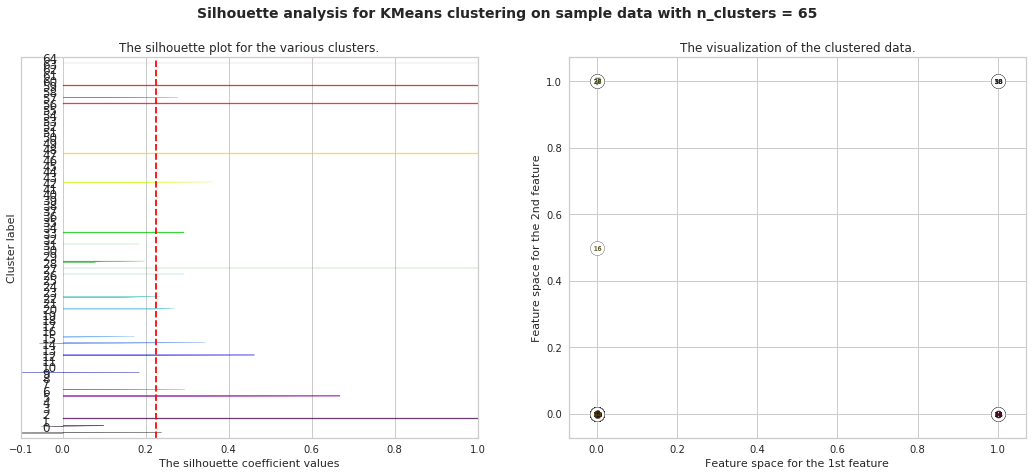

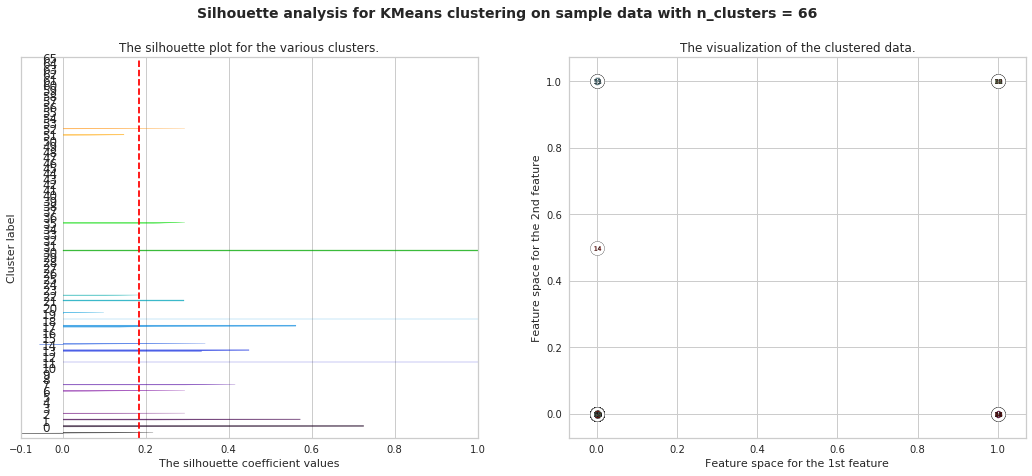

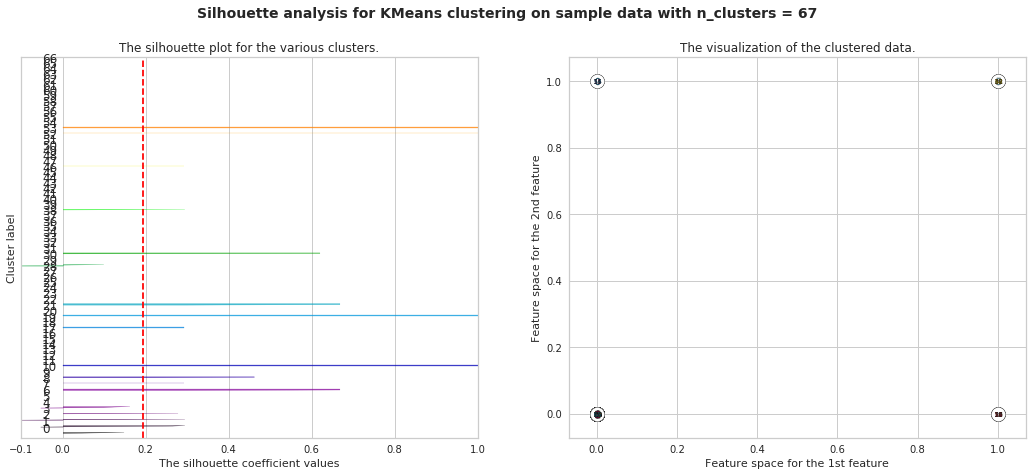

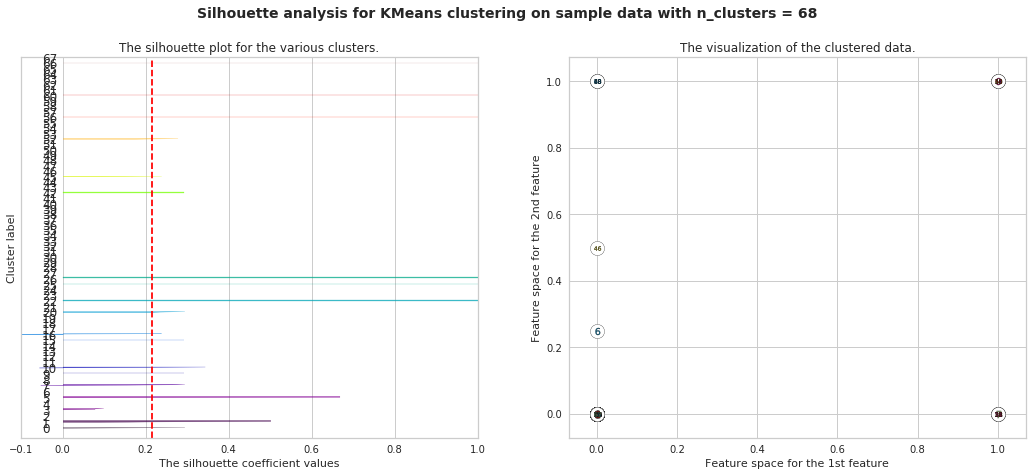

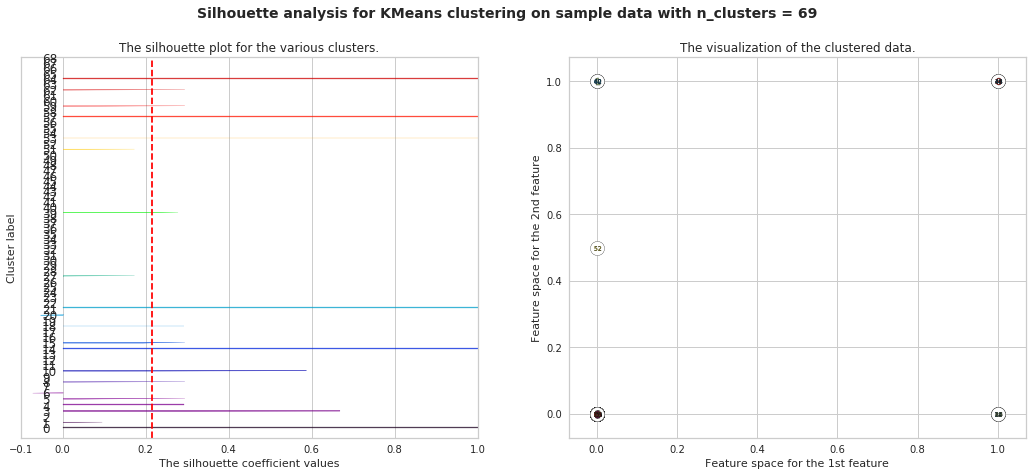

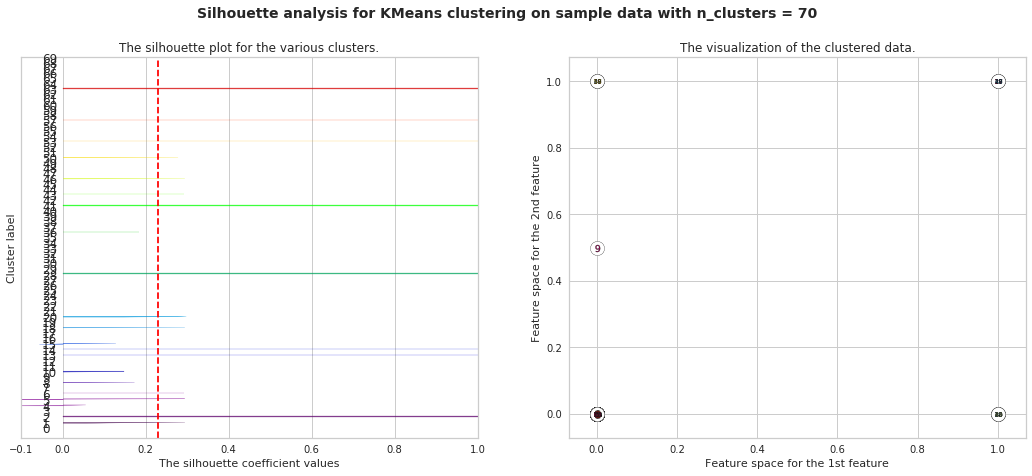

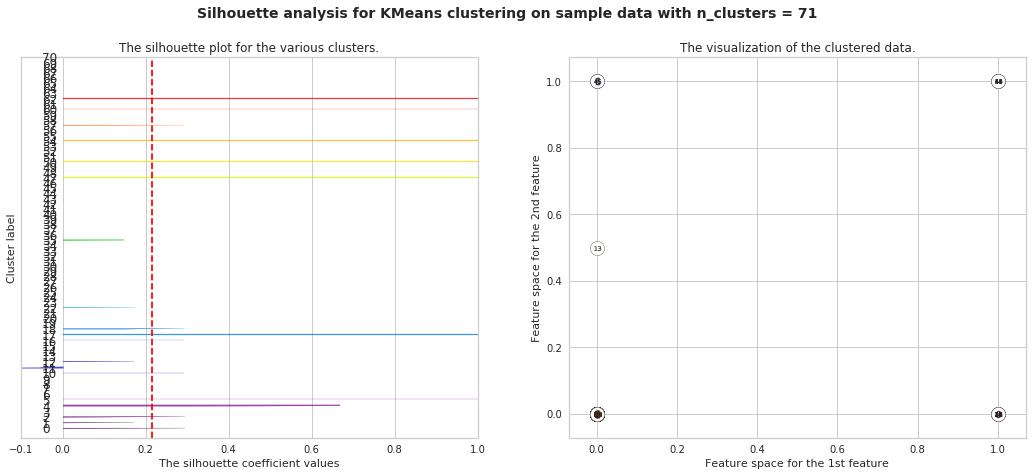

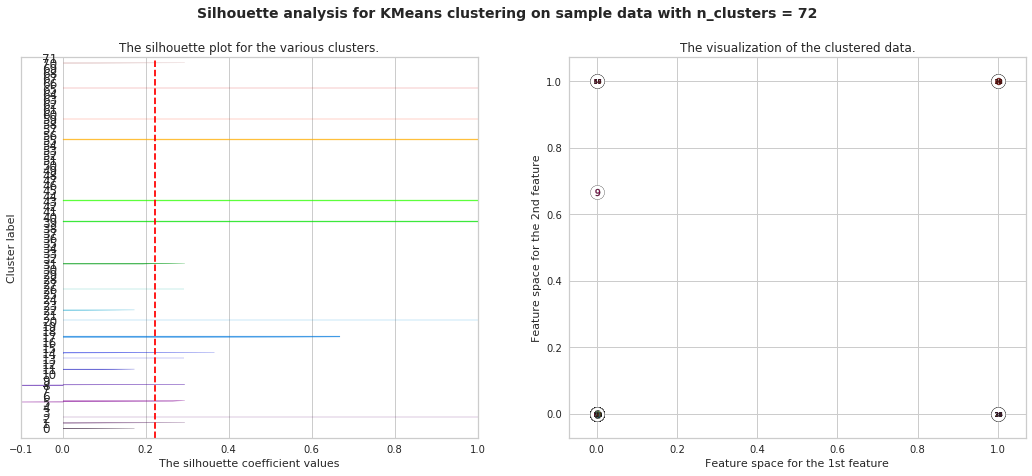

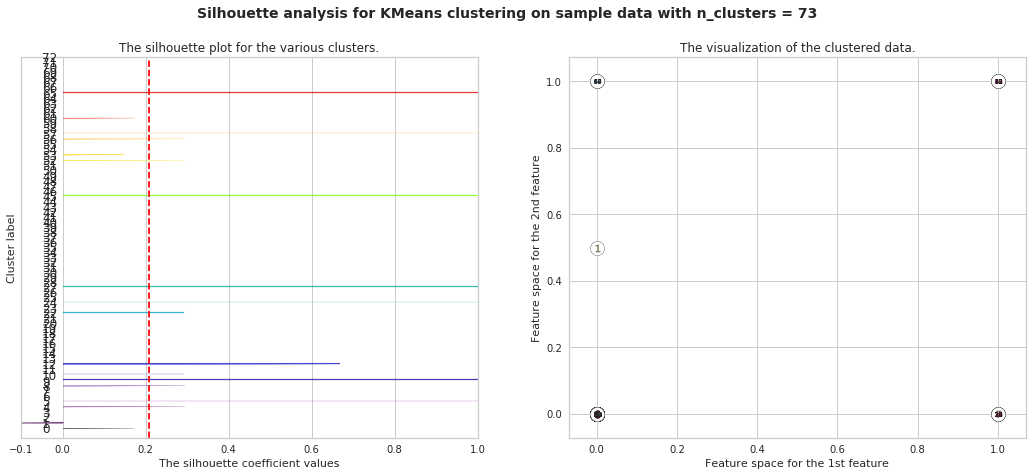

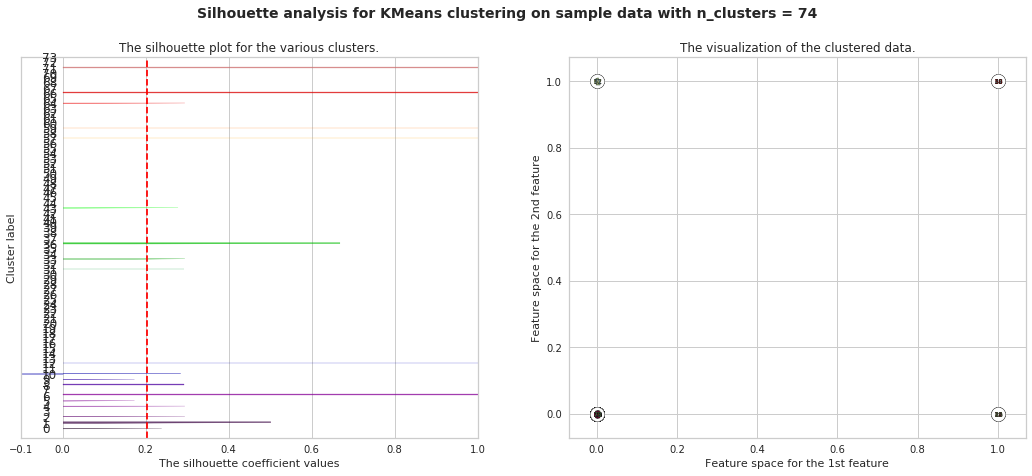

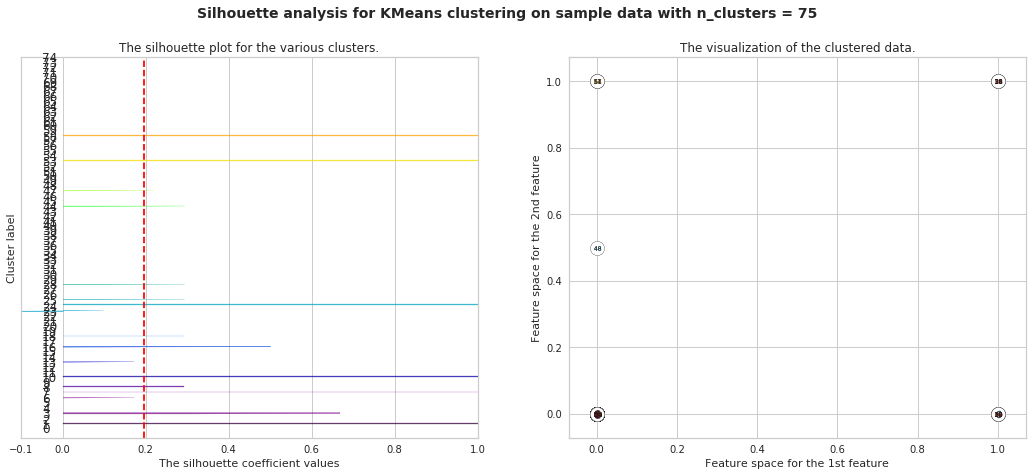

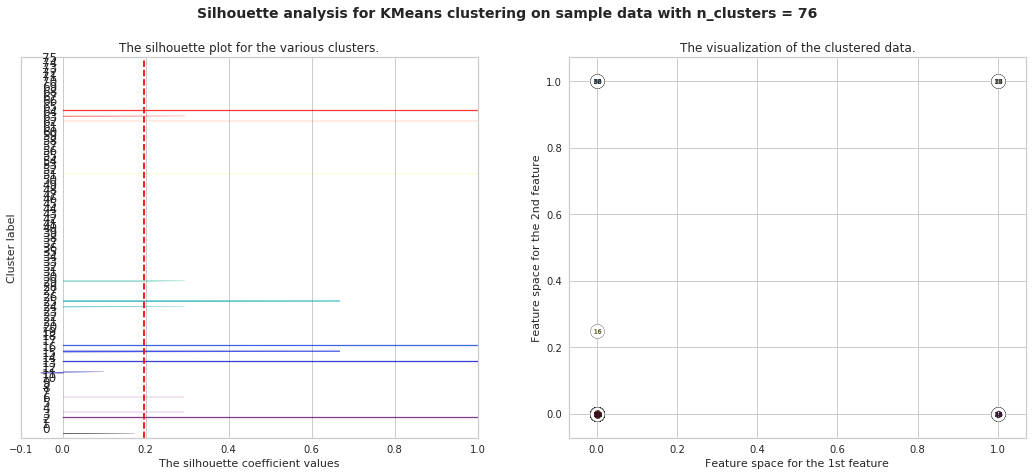

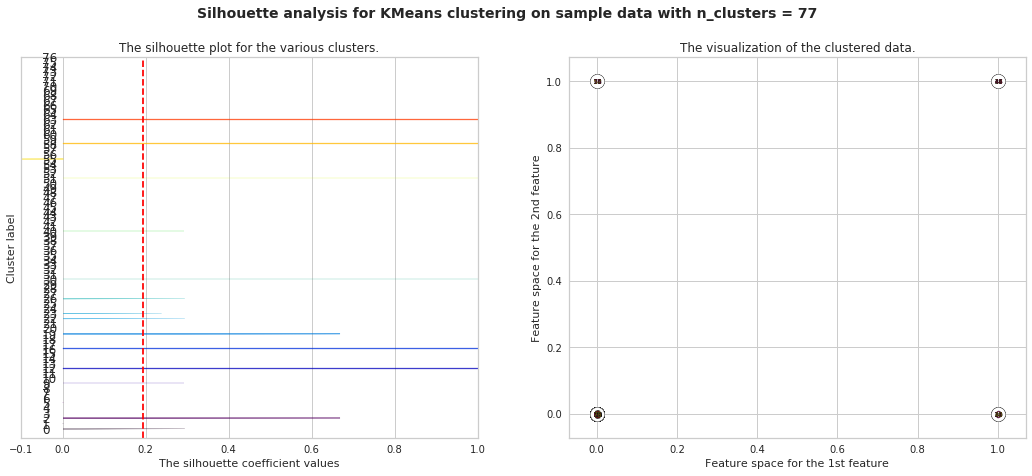

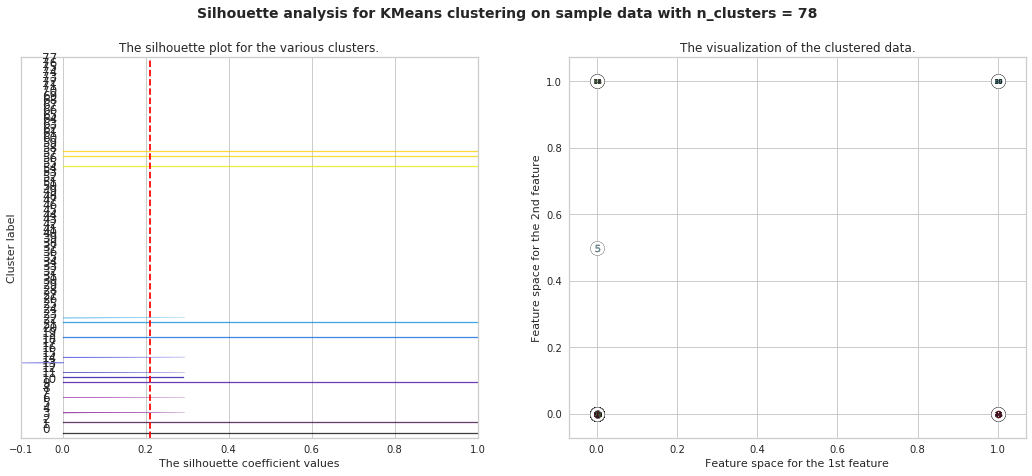

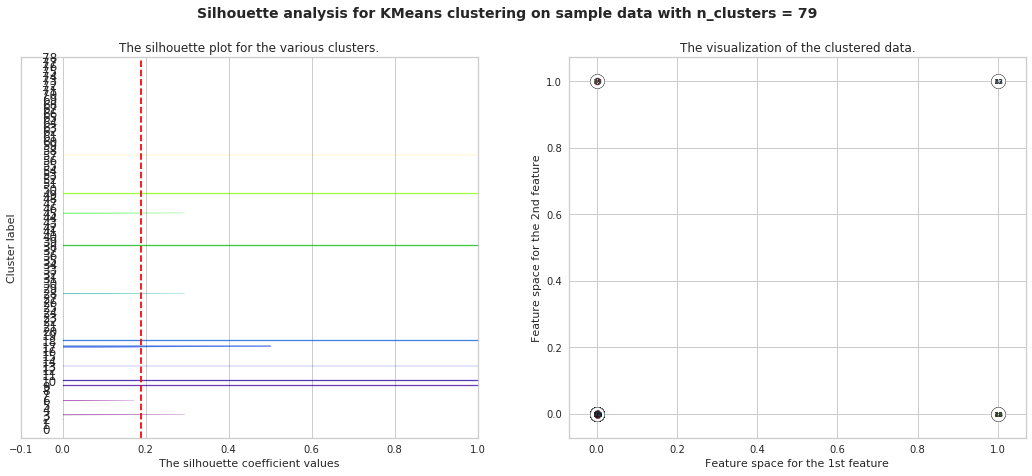

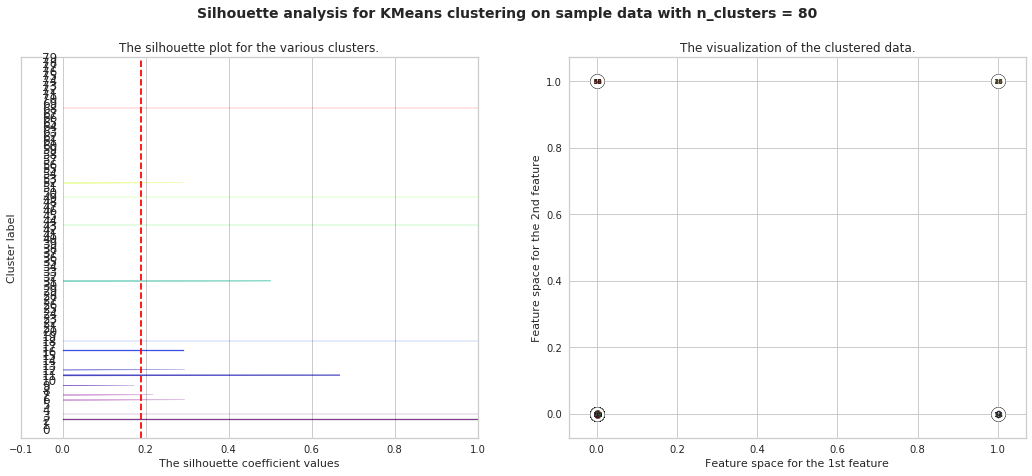

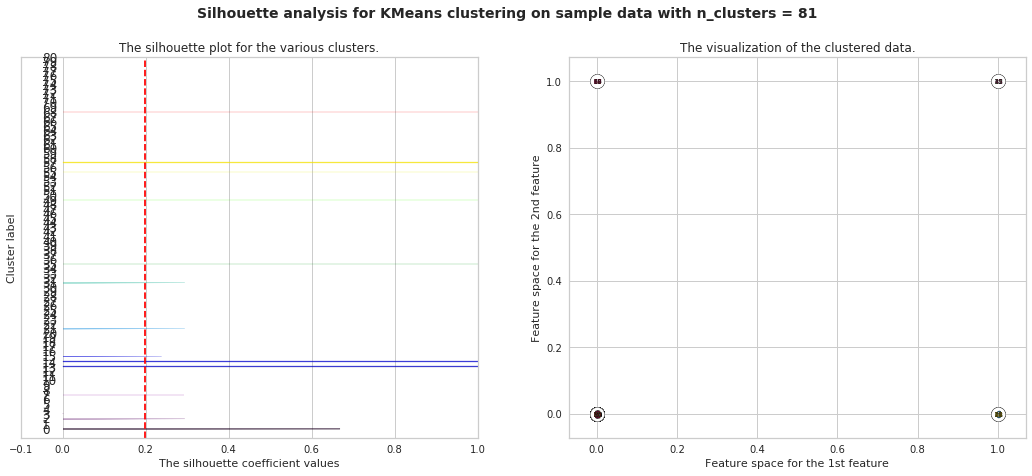

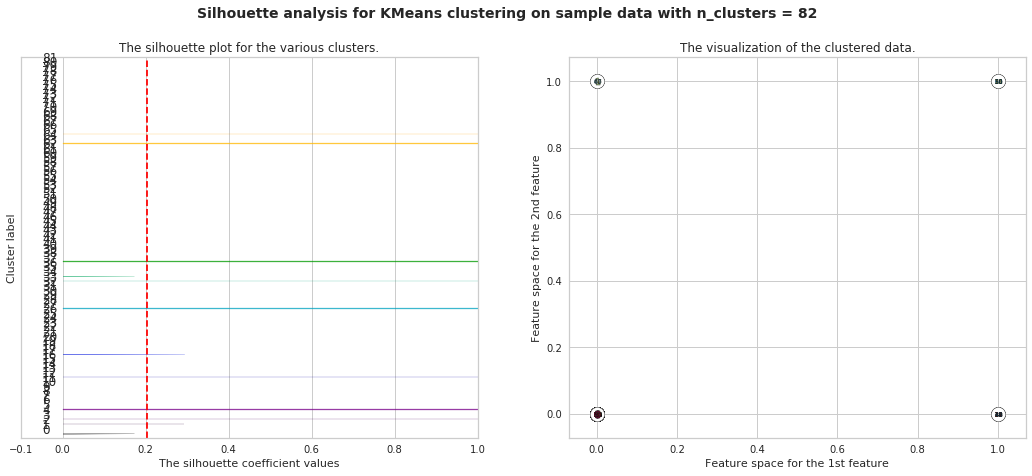

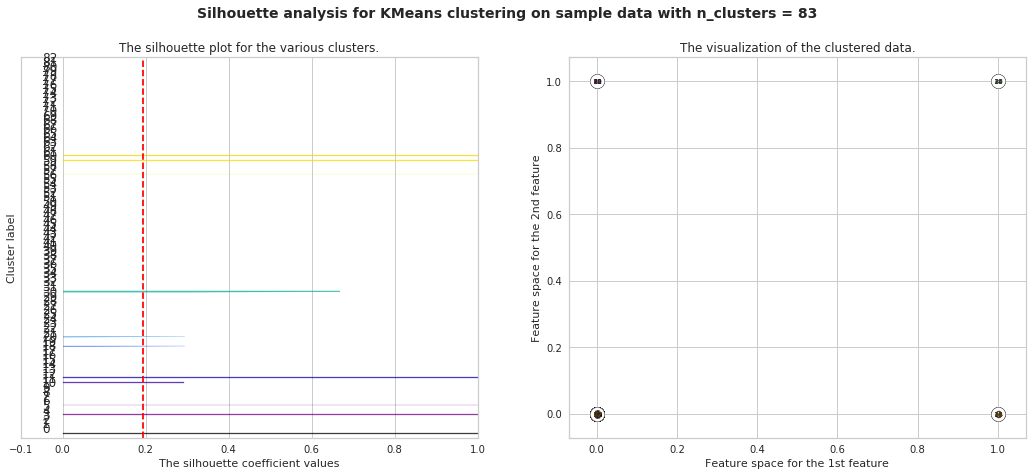

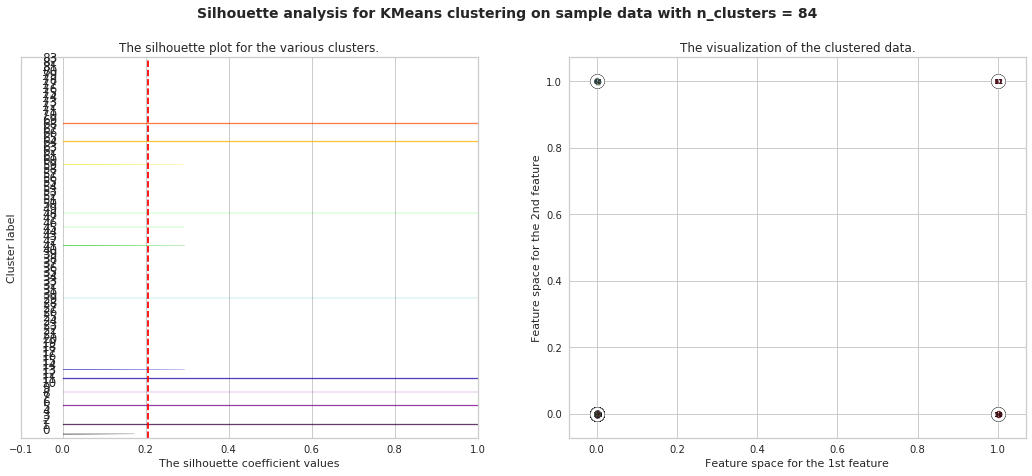

In [90]:
# Your turn.
#from sklearn.metrics import silhouette_samples, silhouette_score
#scores = []
#for i in range(0, len(kmeans)):
#    scores.append(silhouette_score(df, kmeans[i].labels_))


from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

print(__doc__)

X = df.to_numpy()

j=-1
range_n_clusters = Nc#[2, 3, 4, 5, 6]

for n_clusters in Nc:#range_n_clusters:
    j+=1
    if n_clusters == 1:#skip the first one if that's causing problems...
        continue
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = kmeans[j]#KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = kmeans[j].labels_
    y = kmeans[j].labels_
    #clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

In [ ]:
#I seriously must be doing something wrong here because according to the scoring measure, there is nothing worth clustering
#here. Well, according to the data I fed it, I could have told you that anyway. I mean, really, did I do something wrong
#with the data? Is this an incomplete dataset? I'm really not sure what happened here. But it seems like a completely
#inappropriate dataset to run clusering on.

### Choosing $K$: The Gap Statistic

There is one last method worth covering for picking $K$, the so-called Gap statistic. The computation for the gap statistic builds on the sum-of-squares established in the Elbow method discussion, and compares it to the sum-of-squares of a "null distribution," that is, a random set of points with no clustering. The estimate for the optimal number of clusters $K$ is the value for which $\log{SS}$ falls the farthest below that of the reference distribution:

$$G_k = E_n^*\{\log SS_k\} - \log SS_k$$

In other words a good clustering yields a much larger difference between the reference distribution and the clustered data. The reference distribution is a Monte Carlo (randomization) procedure that constructs $B$ random distributions of points within the bounding box (limits) of the original data and then applies K-means to this synthetic distribution of data points.. $E_n^*\{\log SS_k\}$ is just the average $SS_k$ over all $B$ replicates. We then compute the standard deviation $\sigma_{SS}$ of the values of $SS_k$ computed from the $B$ replicates of the reference distribution and compute

$$s_k = \sqrt{1+1/B}\sigma_{SS}$$

Finally, we choose $K=k$ such that $G_k \geq G_{k+1} - s_{k+1}$.

### Aside: Choosing $K$ when we Have Labels

Unsupervised learning expects that we do not have the labels. In some situations, we may wish to cluster data that is labeled. Computing the optimal number of clusters is much easier if we have access to labels. There are several methods available. We will not go into the math or details since it is rare to have access to the labels, but we provide the names and references of these measures.

* Adjusted Rand Index
* Mutual Information
* V-Measure
* Fowlkes–Mallows index

See [this article](http://scikit-learn.org/stable/modules/clustering.html) for more information about these metrics.

## Visualizing Clusters using PCA

How do we visualize clusters? If we only had two features, we could likely plot the data as is. But we have 100 data points each containing 32 features (dimensions). Principal Component Analysis (PCA) will help us reduce the dimensionality of our data from 32 to something lower. For a visualization on the coordinate plane, we will use 2 dimensions. In this exercise, we're going to use it to transform our multi-dimensional dataset into a 2 dimensional dataset.

This is only one use of PCA for dimension reduction. We can also use PCA when we want to perform regression but we have a set of highly correlated variables. PCA untangles these correlations into a smaller number of features/predictors all of which are orthogonal (not correlated). PCA is also used to reduce a large set of variables into a much smaller one.

<div class="span5 alert alert-info">
<h3>Checkup Exercise Set IV</h3>

<p><b>Exercise:</b> Use PCA to plot your clusters:</p>

<ul>
<li> Use scikit-learn's [`PCA`](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) function to reduce the dimensionality of your clustering data to 2 components
<li> Create a data frame with the following fields:
  <ul>
  <li> customer name
  <li> cluster id the customer belongs to
  <li> the two PCA components (label them `x` and `y`)
  </ul>
<li> Plot a scatterplot of the `x` vs `y` columns
<li> Color-code points differently based on cluster ID
<li> How do the clusters look? 
<li> Based on what you see, what seems to be the best value for $K$? Moreover, which method of choosing $K$ seems to have produced the optimal result visually?
</ul>

<p><b>Exercise:</b> Now look at both the original raw data about the offers and transactions and look at the fitted clusters. Tell a story about the clusters in context of the original data. For example, do the clusters correspond to wine variants or something else interesting?</p>
</div>

In [99]:
#your turn
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
x = StandardScaler().fit_transform(X)
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf, dfc], axis = 1)

/home/brandon/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/brandon/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [102]:
finalDf.head()

principal component 1  principal component 2  label
0              -2.487987              -0.250051      0
1               0.734965              -0.132604      1
2               0.058854               2.914504      2
3              -1.650273              -0.289562      0
4              -0.398132              -1.991045      1

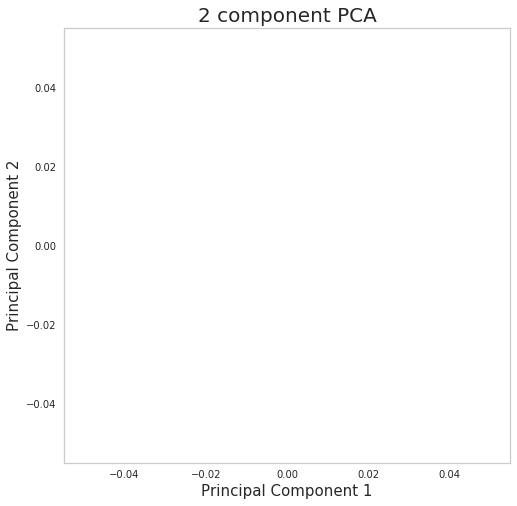

In [103]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
colors = ['r', 'g', 'b', 'p']
for target, color in zip(dfc,colors):
    indicesToKeep = finalDf['label'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
#ax.legend(targets)
ax.grid()

What we've done is we've taken those columns of 0/1 indicator variables, and we've transformed them into a 2-D dataset. We took one column and arbitrarily called it `x` and then called the other `y`. Now we can throw each point into a scatterplot. We color coded each point based on it's cluster so it's easier to see them.

<div class="span5 alert alert-info">
<h3>Exercise Set V</h3>

<p>As we saw earlier, PCA has a lot of other uses. Since we wanted to visualize our data in 2 dimensions, restricted the number of dimensions to 2 in PCA. But what is the true optimal number of dimensions?</p>

<p><b>Exercise:</b> Using a new PCA object shown in the next cell, plot the `explained_variance_` field and look for the elbow point, the point where the curve's rate of descent seems to slow sharply. This value is one possible value for the optimal number of dimensions. What is it?</p>
</div>

In [10]:
#Ok, so since I'm having no luck with clustering with the given data, I will instead use a dataset from my research to 
#demonstrate my knowledge of clustering.

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import MDAnalysis as mda
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
#import plotly.plotly as py
import math

In [12]:
u = mda.Universe("Bound_Pa_180_whole_trjconv.xtc")
print("done loading")
pos = np.zeros(shape = (len(u.trajectory),3*len(u.atoms.positions)))
for i, ts in enumerate(u.trajectory):
    pos[i] = np.reshape(u.atoms.positions,(3*len(u.atoms.positions)))
    if i%10000 == 0:
        print("iteration", i)
#pos_rescaled = np.reshape(np.array(pos),(3*len(pos[0]),len(pos)))
pos_pd = pd.DataFrame(data = pos)
#pos_pd[1538][1]

done loading
iteration 0
iteration 10000
iteration 20000
iteration 30000
iteration 40000
iteration 50000
iteration 60000
iteration 70000
iteration 80000
iteration 90000
iteration 100000
iteration 110000
iteration 120000
iteration 130000
iteration 140000
iteration 150000
iteration 160000
iteration 170000
iteration 180000
iteration 190000
iteration 200000
iteration 210000
iteration 220000
iteration 230000
iteration 240000
iteration 250000
iteration 260000
iteration 270000
iteration 280000
iteration 290000
iteration 300000
iteration 310000
iteration 320000
iteration 330000
iteration 340000
iteration 350000
iteration 360000
iteration 370000
iteration 380000
iteration 390000
iteration 400000
iteration 410000
iteration 420000
iteration 430000
iteration 440000
iteration 450000
iteration 460000
iteration 470000
iteration 480000
iteration 490000
iteration 500000


In [13]:
def d(pos,i,j,t):
    #i -= 1
    #j -= 1
    x = pos[t][i*3]-pos[t][j*3]
    y = pos[t][i*3+1]-pos[t][j*3+1]
    z = pos[t][i*3+2]-pos[t][j*3+2]
    return math.sqrt(x**2+y**2+z**2)

In [14]:
n = len(pos[0])/3
dist = np.zeros(shape=(len(pos),16))
for t in range(len(pos)):
    #print(t)
    cnt = 0
    for i in range(4):
        for j in range(4,8):
            #dex = int(0.5*(2*(n-1)-i)*(i-1)+j-i-1)
            #print(dex)
            dist[t][cnt] = d(pos,i,j,t)
            cnt +=1
dist

array([[49.11870375, 57.75189489, 41.27084109, ..., 31.44673965,
        30.32521447, 17.45998994],
       [76.18968132, 71.01364919, 55.65421378, ..., 34.19768432,
        21.38643588, 54.47739493],
       [68.06750943, 69.13686766, 46.15644191, ..., 31.81375573,
        17.12881652, 54.81753819],
       ...,
       [63.43151089, 64.63712415, 41.94921451, ..., 59.74637366,
        47.71698699, 31.11305378],
       [62.80416307, 66.89429529, 44.73410024, ..., 62.65788963,
        51.64031211, 31.41359184],
       [87.44485015, 75.18178419, 68.89819985, ..., 37.55611117,
        37.48843892, 42.28282396]])

In [15]:
np.save("dist.npy", dist)

In [3]:
dist = np.load("dist.npy")
dist

array([[49.11870375, 57.75189489, 41.27084109, ..., 31.44673965,
        30.32521447, 17.45998994],
       [76.18968132, 71.01364919, 55.65421378, ..., 34.19768432,
        21.38643588, 54.47739493],
       [68.06750943, 69.13686766, 46.15644191, ..., 31.81375573,
        17.12881652, 54.81753819],
       ...,
       [63.43151089, 64.63712415, 41.94921451, ..., 59.74637366,
        47.71698699, 31.11305378],
       [62.80416307, 66.89429529, 44.73410024, ..., 62.65788963,
        51.64031211, 31.41359184],
       [87.44485015, 75.18178419, 68.89819985, ..., 37.55611117,
        37.48843892, 42.28282396]])

In [19]:
#First let's do Kmeans real quick
from sklearn.cluster import KMeans

In [20]:
fit = KMeans(n_clusters=5).fit(dist)

In [24]:
fits = []
ks = [2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,45,50]
ss = np.zeros(len(ks))
for i,k in enumerate(ks):
    print(k)
    fit = KMeans(n_clusters=k).fit(dist)
    ss[i] = fit.inertia_
    fits.append(fit)
ss

2
3
4
5
6
7
8
9
10
15
20
25


KeyboardInterrupt: 

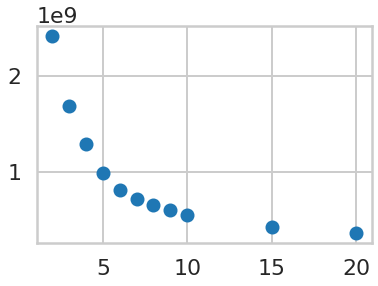

In [26]:
plt.scatter(ks[:-6],ss[:-6])
plt.show()

In [ ]:
#ok so that was enough clusters. Here we can see that if we choose k near 10 we get near the elbow of this curve. Let's use
#k=10 for visualization purposes then.

In [9]:
#your turn
# Initialize a new PCA model with a default number of components.
import sklearn.decomposition
pca = sklearn.decomposition.PCA()
#pca.fit(X)
pca.fit(dist)

# Do the rest on your own :)


PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [10]:
pcs = pca.fit_transform(dist)
cols = []
for j in range(1, 17):
    cols.append('pC' + str(j))
pdf = pd.DataFrame(data = pcs, columns = cols)
pdf.head()

pC1        pC2        pC3        pC4        pC5        pC6  \
0  -12.831467  -1.855562 -36.253462   9.977548  -2.203120  -7.242986   
1   50.801024  -4.228887 -17.422828 -37.099974 -38.601665 -18.248381   
2   22.826416  -0.368539 -18.959566 -36.219657 -27.023364 -10.408586   
3   59.591568  15.074241 -33.338301 -38.701421 -26.058224 -20.022890   
4  126.934675 -13.676016 -20.985486 -36.148135 -27.627533  -8.855038   

         pC7        pC8        pC9       pC10      pC11      pC12      pC13  \
0  -6.082244   1.522837  -2.784856   5.077996  4.476507  0.079015 -0.958924   
1  23.036891  24.344208 -11.844585  -5.963354 -2.324015  7.060873 -0.603655   
2  22.218152  28.936215  -4.993028   2.804182  1.691342  0.177742 -8.257914   
3  10.271822  11.915329  -5.642558  10.399663 -4.214213 -2.648488 -8.479644   
4  16.746659  34.349848 -16.689545   4.579369 -2.153363 -6.985008 -9.265726   

       pC14      pC15      pC16  
0  0.068587  1.750438  0.871852  
1 -0.266752  1.897159  1.299226  
2  2.771334  4.753090 -0.874346  
3  0.452291 -1.535974  1.521013  
4  0.513346  2.631535  0.563747

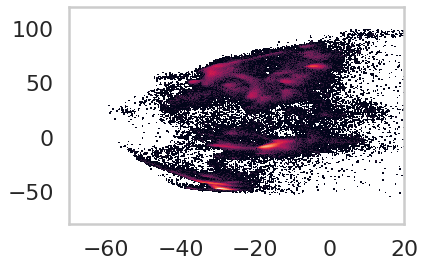

In [34]:
h =plt.hist2d(pdf['pC1'], pdf['pC2'], bins=(500,500),range=[[-70,20],[-80,120]],norm=matplotlib.colors.LogNorm())

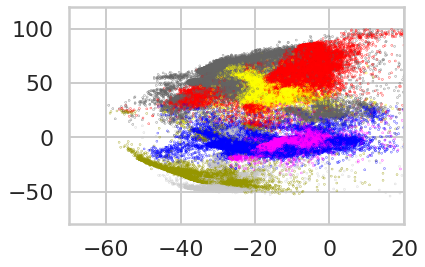

In [89]:
#plt.hist2d(pdf['pC1'], pdf['pC2'], bins=(500,500), norm=matplotlib.colors.LogNorm())
plt.scatter(pdf['pC1'], pdf['pC2'], c=cs, s=s)
plt.xlim(-70, 20)
plt.ylim(-80, 120)
plt.show()

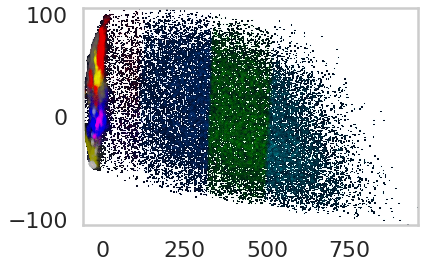

In [88]:
plt.hist2d(pdf['pC1'], pdf['pC2'], bins=(500,500), norm=matplotlib.colors.LogNorm())
plt.scatter(pdf['pC1'], pdf['pC2'], c=cs,alpha=0.1,s=s)
plt.show()

In [23]:
colors = []
colors.append(np.true_divide(np.array([255,0,0]),255))
colors.append(np.true_divide(np.array([0,255,0]),255))
colors.append(np.true_divide(np.array([0,0,255]),255))
colors.append(np.true_divide(np.array([255,255,0]),255))
colors.append(np.true_divide(np.array([255,0,255]),255))
colors.append(np.true_divide(np.array([0,255,255]),255))
colors.append(np.true_divide(np.array([100,100,100]),255))
colors.append(np.true_divide(np.array([200,200,200]),255))
colors.append(np.true_divide(np.array([0,127,255]),255))
colors.append(np.true_divide(np.array([150,150,0]),255))

In [84]:

cs = np.zeros(shape=(len(pdf['pC1']),3))

for i in range(0, len(pdf['pC1'])):
    cs[i] = colors[fits[8].labels_[i]]

In [39]:
len(pdf['pC1'])

500001

In [40]:
fits[8].labels_

array([4, 4, 4, ..., 6, 6, 0], dtype=int32)

In [44]:
fits[8].labels_[0]

4

In [83]:
colors

[array([1., 0., 0.]),
 array([0., 1., 0.]),
 array([0., 0., 1.]),
 array([1., 1., 0.]),
 array([1., 0., 1.]),
 array([0., 1., 1.]),
 array([0.39215686, 0.39215686, 0.39215686]),
 array([0.78431373, 0.78431373, 0.78431373]),
 array([0.        , 0.49803922, 1.        ]),
 array([0.58823529, 0.58823529, 0.        ])]

In [51]:
#takes a np array and prints the colors
from colr import color
def printColors(fit):
    s = """          """#dummy block
    string = ""
    for i, c in enumerate(fit):
        string += color(s, back=(c[0], c[1], c[2]))
        #print(color(s, back=(c[0], c[1], c[2])))
        if (i+1)%5==0:
            string += "\n"
    print(string)
def printColor(c):
    s = """          """#dummy block
    print(color(s, back=(c[0], c[1], c[2])))

In [54]:
for c in colors:
    printColor(c)

In [48]:
s=np.full(len(pdf['pC1']), 0.1)

In [81]:
np.true_divide(np.array([255,0,0]),255)

array([1., 0., 0.])

In [90]:
pca.explained_variance_
#explained_variance_

array([9.91168584e+03, 1.76475848e+03, 7.75186377e+02, 5.10524297e+02,
       2.24651095e+02, 1.67411912e+02, 9.43636850e+01, 8.17170468e+01,
       4.84545498e+01, 3.71840656e+01, 2.46694570e+01, 1.56303824e+01,
       1.07867272e+01, 9.91421805e+00, 6.81653383e+00, 4.35733585e+00])

In [91]:
pca.explained_variance_ratio_

array([7.24109054e-01, 1.28926362e-01, 5.66320890e-02, 3.72969111e-02,
       1.64121315e-02, 1.22304604e-02, 6.89384226e-03, 5.96992826e-03,
       3.53990016e-03, 2.71652260e-03, 1.80225417e-03, 1.14189469e-03,
       7.88036156e-04, 7.24294047e-04, 4.97989337e-04, 3.18329938e-04])

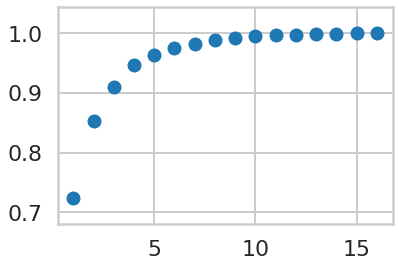

In [95]:
x=np.array([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16])
plt.scatter(x,np.cumsum(pca.explained_variance_ratio_))

In [ ]:
#It seems somewhere around 5 dimensions gets me a pretty good capturing of the variances

## Other Clustering Algorithms

k-means is only one of a ton of clustering algorithms. Below is a brief description of several clustering algorithms, and the table provides references to the other clustering algorithms in scikit-learn. 

* **Affinity Propagation** does not require the number of clusters $K$ to be known in advance! AP uses a "message passing" paradigm to cluster points based on their similarity. 

* **Spectral Clustering** uses the eigenvalues of a similarity matrix to reduce the dimensionality of the data before clustering in a lower dimensional space. This is tangentially similar to what we did to visualize k-means clusters using PCA. The number of clusters must be known a priori.

* **Ward's Method** applies to hierarchical clustering. Hierarchical clustering algorithms take a set of data and successively divide the observations into more and more clusters at each layer of the hierarchy. Ward's method is used to determine when two clusters in the hierarchy should be combined into one. It is basically an extension of hierarchical clustering. Hierarchical clustering is *divisive*, that is, all observations are part of the same cluster at first, and at each successive iteration, the clusters are made smaller and smaller. With hierarchical clustering, a hierarchy is constructed, and there is not really the concept of "number of clusters." The number of clusters simply determines how low or how high in the hierarchy we reference and can be determined empirically or by looking at the [dendogram](https://docs.scipy.org/doc/scipy-0.18.1/reference/generated/scipy.cluster.hierarchy.dendrogram.html).

* **Agglomerative Clustering** is similar to hierarchical clustering but but is not divisive, it is *agglomerative*. That is, every observation is placed into its own cluster and at each iteration or level or the hierarchy, observations are merged into fewer and fewer clusters until convergence. Similar to hierarchical clustering, the constructed hierarchy contains all possible numbers of clusters and it is up to the analyst to pick the number by reviewing statistics or the dendogram.

* **DBSCAN** is based on point density rather than distance. It groups together points with many nearby neighbors. DBSCAN is one of the most cited algorithms in the literature. It does not require knowing the number of clusters a priori, but does require specifying the neighborhood size.

### Clustering Algorithms in Scikit-learn
<table border="1">
<colgroup>
<col width="15%" />
<col width="16%" />
<col width="20%" />
<col width="27%" />
<col width="22%" />
</colgroup>
<thead valign="bottom">
<tr><th>Method name</th>
<th>Parameters</th>
<th>Scalability</th>
<th>Use Case</th>
<th>Geometry (metric used)</th>
</tr>
</thead>
<tbody valign="top">
<tr><td>K-Means</span></a></td>
<td>number of clusters</td>
<td>Very large<span class="pre">n_samples</span>, medium <span class="pre">n_clusters</span> with
MiniBatch code</td>
<td>General-purpose, even cluster size, flat geometry, not too many clusters</td>
<td>Distances between points</td>
</tr>
<tr><td>Affinity propagation</td>
<td>damping, sample preference</td>
<td>Not scalable with n_samples</td>
<td>Many clusters, uneven cluster size, non-flat geometry</td>
<td>Graph distance (e.g. nearest-neighbor graph)</td>
</tr>
<tr><td>Mean-shift</td>
<td>bandwidth</td>
<td>Not scalable with <span class="pre">n_samples</span></td>
<td>Many clusters, uneven cluster size, non-flat geometry</td>
<td>Distances between points</td>
</tr>
<tr><td>Spectral clustering</td>
<td>number of clusters</td>
<td>Medium <span class="pre">n_samples</span>, small <span class="pre">n_clusters</span></td>
<td>Few clusters, even cluster size, non-flat geometry</td>
<td>Graph distance (e.g. nearest-neighbor graph)</td>
</tr>
<tr><td>Ward hierarchical clustering</td>
<td>number of clusters</td>
<td>Large <span class="pre">n_samples</span> and <span class="pre">n_clusters</span></td>
<td>Many clusters, possibly connectivity constraints</td>
<td>Distances between points</td>
</tr>
<tr><td>Agglomerative clustering</td>
<td>number of clusters, linkage type, distance</td>
<td>Large <span class="pre">n_samples</span> and <span class="pre">n_clusters</span></td>
<td>Many clusters, possibly connectivity constraints, non Euclidean
distances</td>
<td>Any pairwise distance</td>
</tr>
<tr><td>DBSCAN</td>
<td>neighborhood size</td>
<td>Very large <span class="pre">n_samples</span>, medium <span class="pre">n_clusters</span></td>
<td>Non-flat geometry, uneven cluster sizes</td>
<td>Distances between nearest points</td>
</tr>
<tr><td>Gaussian mixtures</td>
<td>many</td>
<td>Not scalable</td>
<td>Flat geometry, good for density estimation</td>
<td>Mahalanobis distances to  centers</td>
</tr>
<tr><td>Birch</td>
<td>branching factor, threshold, optional global clusterer.</td>
<td>Large <span class="pre">n_clusters</span> and <span class="pre">n_samples</span></td>
<td>Large dataset, outlier removal, data reduction.</td>
<td>Euclidean distance between points</td>
</tr>
</tbody>
</table>
Source: http://scikit-learn.org/stable/modules/clustering.html

<div class="span5 alert alert-info">
<h3>Exercise Set VI</h3>

<p><b>Exercise:</b> Try clustering using the following algorithms. </p>
<ol>
<li>Affinity propagation
<li>Spectral clustering
<li>Agglomerative clustering
<li>DBSCAN
</ol>
<p>How do their results compare? Which performs the best? Tell a story why you think it performs the best.</p>
</div>


In [5]:
# Your turn
from sklearn.cluster import AffinityPropagation, SpectralClustering, AgglomerativeClustering, DBSCAN

In [97]:
fitAP = AffinityPropagation().fit(dist)

MemoryError: 

In [99]:
#memory error, so let's run it on a subset of the data

In [54]:
idx = np.random.randint(len(pdf['pC1']), size=10000)
dist_sub = dist[idx,:]

In [55]:
dist_sub

array([[41.0417367 , 52.19560857, 34.78336043, ..., 32.58295371,
        29.98503639, 15.99062378],
       [37.05975483, 51.03203817, 36.04212348, ..., 32.66275035,
        28.62934141, 17.48339681],
       [63.62413888, 70.56694488, 51.27949943, ..., 61.52106789,
        55.13265955, 25.53837487],
       ...,
       [47.3330704 , 44.54195895, 38.68361413, ..., 17.26001542,
        32.69903147, 38.58878888],
       [20.53529142, 40.38829939, 46.00646486, ..., 28.01209852,
        17.1394118 , 50.07047066],
       [74.26828308, 63.16786931, 46.31660077, ..., 36.5163635 ,
        18.3064635 , 31.77821477]])

In [59]:
fitAP = AffinityPropagation(damping=0.75).fit(dist_sub)#need to add damping parameter because I need some freedom

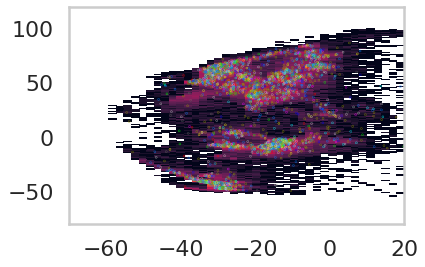

In [70]:
plt.hist2d(pdf['pC1'], pdf['pC2'], bins=(500,500), norm=matplotlib.colors.LogNorm())
plt.scatter(pdf['pC1'][idxAP], pdf['pC2'][idxAP], c=cs, s=s)
plt.xlim(-70, 20)
plt.ylim(-80, 120)
plt.show()
#this one doesn't appear to have worked right...not sure why

In [60]:
fitAP.cluster_centers_.shape

(205, 16)

In [67]:
labels, counts = np.unique(fitAP.labels_, return_counts=True)
labels_counts = np.column_stack((labels,counts))
labels_counts[labels_counts[:,1].argsort()][-10:]
highPLabels = [64,132,188,138,41,70,129,149,182,10]
highPCts = [179,228,238,263,277,364,395,825,1208,1817]
nPts = np.sum(highPCts)
idxAP = np.zeros(nPts)
c=0
cs = np.zeros(shape=(nPts,3))
for i in range(0, 10000):
    if fitAP.labels_[i] in highPLabels:
        idxAP[c] = i
        cs[c] = colors[np.where(highPLabels == fitAP.labels_[i])[0][0]]
        c += 1

In [116]:
fitSC = SpectralClustering(n_clusters=10).fit(dist_sub)#this also had a memory problem

/home/brandon/anaconda3/lib/python3.7/site-packages/sklearn/manifold/spectral_embedding_.py:235: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


In [118]:
fitSC.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

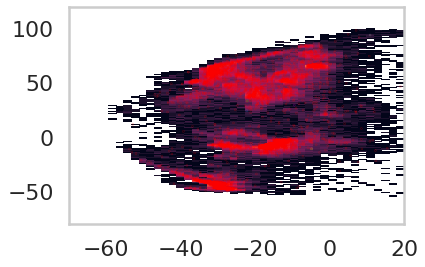

In [131]:
cs = np.zeros(shape=(10000,3))
for i in range(0, 10000):
    cs[i] = colors[fitSC.labels_[i]]
plt.hist2d(pdf['pC1'], pdf['pC2'], bins=(500,500), norm=matplotlib.colors.LogNorm())
plt.scatter(pdf['pC1'][idx], pdf['pC2'][idx], c=cs,alpha=0.5,s=s)
plt.xlim(-70, 20)
plt.ylim(-80, 120)
plt.show()

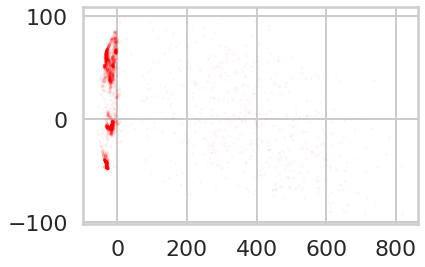

In [136]:
#plt.hist2d(pdf['pC1'], pdf['pC2'], bins=(500,500), norm=matplotlib.colors.LogNorm())
plt.scatter(pdf['pC1'][idx], pdf['pC2'][idx], c=cs,alpha=0.1,s=s)
plt.show()

In [125]:
#well this one appears to be an absolue nightmare.

In [127]:
fitAC = AgglomerativeClustering(n_clusters=10).fit(dist_sub)#this also had a memory problem

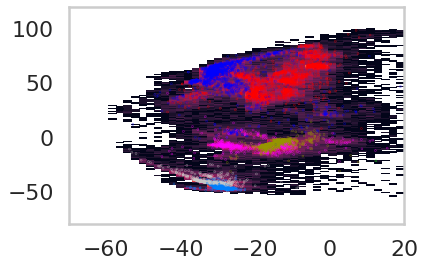

In [142]:
cs = np.zeros(shape=(10000,3))
for i in range(0, 10000):
    cs[i] = colors[fitAC.labels_[i]]
plt.hist2d(pdf['pC1'], pdf['pC2'], bins=(500,500), norm=matplotlib.colors.LogNorm())
plt.scatter(pdf['pC1'][idx], pdf['pC2'][idx], c=cs,alpha=0.9,s=s)
plt.xlim(-70, 20)
plt.ylim(-80, 120)
plt.show()

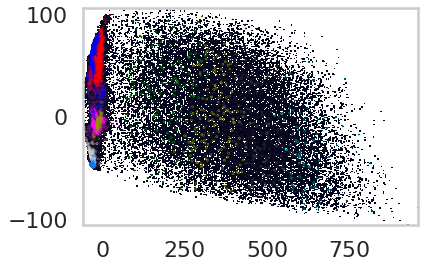

In [144]:
cs = np.zeros(shape=(10000,3))
for i in range(0, 10000):
    cs[i] = colors[fitAC.labels_[i]]
plt.hist2d(pdf['pC1'], pdf['pC2'], bins=(500,500), norm=matplotlib.colors.LogNorm())
plt.scatter(pdf['pC1'][idx], pdf['pC2'][idx], c=cs,alpha=0.9,s=s)
plt.show()

In [143]:
#This one seems pretty decent

In [6]:
fitDB = DBSCAN(eps=2.5).fit(dist) #I spent some time, but not a lot, choosing a halfway decent eps parameter

In [11]:
cs = np.zeros(shape=(len(pdf['pC1']),3))
for i in range(0, len(pdf['pC1'])):
    cs[i] = colors[fitDB.labels_[i]]
plt.hist2d(pdf['pC1'], pdf['pC2'], bins=(500,500), norm=matplotlib.colors.LogNorm())
plt.scatter(pdf['pC1'], pdf['pC2'], c=cs,alpha=0.9,s=s)
plt.show()

NameError: name 'colors' is not defined

In [7]:
labels, counts = np.unique(fitDB.labels_, return_counts=True)
for i in range(0, len(counts)):
    print(str(labels[i]) + " " + str(counts[i]))

-1 73983
0 3272
1 38604
2 18412
3 46
4 3217
5 4651
6 58
7 3853
8 118
9 121
10 17832
11 2173
12 2092
13 8684
14 364
15 49
16 124
17 1307
18 996
19 22
20 5
21 122520
22 5
23 4869
24 7
25 218
26 21
27 233
28 32
29 436
30 1611
31 276
32 9741
33 116
34 34005
35 1310
36 832
37 20
38 110
39 5
40 52
41 389
42 12
43 357
44 22
45 123
46 1367
47 1311
48 343
49 46
50 220
51 12
52 74
53 32
54 5
55 147
56 36
57 158
58 3737
59 103
60 238
61 6
62 139
63 42
64 121274
65 111
66 2031
67 6
68 3712
69 1129
70 165
71 396
72 35
73 7
74 5
75 25
76 23
77 11
78 44
79 5
80 63
81 18
82 12
83 13
84 54
85 5
86 11
87 17
88 27
89 28
90 8
91 31
92 17
93 7
94 6
95 6
96 7
97 12
98 7
99 360
100 140
101 7
102 6
103 6
104 18
105 33
106 10
107 12
108 13
109 8
110 5
111 8
112 4
113 1217
114 6
115 17
116 16
117 23
118 14
119 13
120 40
121 5
122 8
123 7
124 7
125 21
126 25
127 7
128 6
129 225
130 8
131 46
132 5
133 88
134 9
135 35
136 7
137 19
138 30
139 8
140 62
141 19
142 34
143 19
144 28
145 5
146 7
147 11
148 5
149 5
150 2

In [17]:
#this will probably be good enough...let's take a look at the 10 highest probability clusters
labels_counts = np.column_stack((labels,counts))

In [22]:
labels_counts[labels_counts[:,1].argsort()][-11:]

array([[     5,   4651],
       [    23,   4869],
       [    13,   8684],
       [    32,   9741],
       [    10,  17832],
       [     2,  18412],
       [    34,  34005],
       [     1,  38604],
       [    -1,  73983],
       [    64, 121274],
       [    21, 122520]])

In [27]:
highPLabels = [5,23,13,32,10,2,34,1,64,21]#labels_counts[labels_counts[:,1].argsort()][-11:][:,0]
highPCts = [4651,4869,8684,9741,17832,18412,34005,38604,121274,122520]

In [29]:
nPts = np.sum(highPCts)

In [50]:
idxDB = np.zeros(nPts)
c=0
cs = np.zeros(shape=(nPts,3))
for i in range(0, len(pdf['pC1'])):
    if fitDB.labels_[i] in highPLabels:
        idxDB[c] = i
        cs[c] = colors[np.where(highPLabels == fitDB.labels_[i])[0][0]]
        c += 1

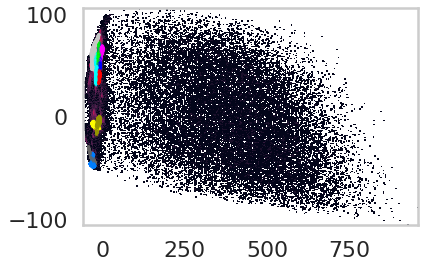

In [51]:
plt.hist2d(pdf['pC1'], pdf['pC2'], bins=(500,500), norm=matplotlib.colors.LogNorm())
plt.scatter(pdf['pC1'][idxDB], pdf['pC2'][idxDB], c=cs,alpha=0.9,s=s)
plt.show()

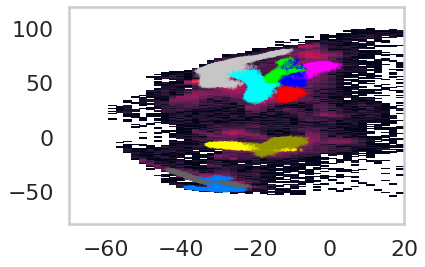

In [52]:
plt.hist2d(pdf['pC1'], pdf['pC2'], bins=(500,500), norm=matplotlib.colors.LogNorm())
plt.scatter(pdf['pC1'][idxDB], pdf['pC2'][idxDB], c=cs,alpha=0.9,s=s)
plt.xlim(-70, 20)
plt.ylim(-80, 120)
plt.show()

In [ ]:
#this one did pretty well. But I expected that. This is probably my personal favorite clustering algorithm.
#I think the reason DBSCAN performs so well is because it can handle non-elliptical cluster geometry using a density-based
#clustering approach.